# **Desafío Técnico Senior Data Scientist - Brain Food**
- Postulante: Fernando Lagos Alvarado

## **I. Contexto**:
Estamos colaborando con una empresa distribuidora de productos agrícolas que se enfrenta a un
problema de exceso de inventario. Recientemente, han modificado su método de proyección de
demanda y sospechan que este cambio está relacionado con la situación actual. Actualmente
utilizan el modelo cada mes para determinar cuánto inventario deben comprar al proveedor. La
orden de compra es enviada al proveedor con un mes de anticipación.
La empresa nos ha contactado con el objetivo de desarrollar un modelo que permita proyectar la
demanda de manera más precisa. Para ello, nos han proporcionado los datos de ventas de los
últimos 10 años, los cuales están a nuestra disposición. A partir del contexto entregado y de los
datos de venta a disposición, responda las siguientes preguntas:


## **II. Plan de Trabajo**:


- ¿Cuál sería tu enfoque y plan de trabajo para abordar este desafío? ¿Qué tareas consideras esenciales para la ejecución de este proyecto? ¿Qué elementos específicos desarrollarías para resolver el problema planteado? Incluye una estimación del tiempo que dedicarías a cada fase y explique cómo tu solución impactaría positivamente en la situación actual de la empresa.




##### __Enfoque de trabajo__: 
En este caso el enfoque de este trabajo será crear un modelo que logre predecir lo más preciso posible la demanda de productos agrícolas. Lo que contribuirá a optimizar el inventario, reduciendo el exceso existente y mejorando la eficiencia en la cadena de suministro.
##### __Flujo de trabajo__:
El desafío se desarrollará en base al siguiente flujo de trabajo:
1. __Definición del problema__ a resolver en base al contexto proporcionado.
2. __Cargar el conjunto de datos__.
3. __Análisis Exploratorio de los Datos (EDA)__ (permitará entender las características clave de los datos, como la estacionalidad, tendencias y ciclos.) (Tiempo de dedicación: 20%)
4. __Preprocesamiento de los datos__ (Limpieza de datos, manejo de valores faltantes, normalización y transformaciones necesarias si corresponde) (Tiempo de dedicación: 15%)
5. __Selección y construcción del modelo__ que pueda capturar con precisión las tendencias y patrones en los datos de ventas históricos (Se realizará más de un modelo).  (Tiempo de dedicación: 40%)
6. __Entrenamiento de los modelos__.
7. __Testing de los modelos__ (Evaluación del rendimiento de los modelos). 
8. __Optimización de los modelos__ (En base a los resultados del testing, ajuste de hiperparámetros).

Cabe destacar que, el entrenamiento, testing y optimización de modelos será un proceso iterativo hasta lograr el mejor rendimiento en precisión.

**Tiempos de dedicación:**
- EDA 10%
- Preprocesamiento 30%
- Modelado 40%
- Validación y optimización 20%


#### **Beneficios significativos de la herramienta en el contexto actual de la empresa:**
- Al contar con una herramienta que logre predecir con precisión la demanda de los productos agrícolas, se reduciría el exceso de inventario y en consecuencia, costos de almacenamiento y pérdida de los productos que se deterioran o caducan antes de su venta.
- Considerando que la frescura y la calidad de los productos agrícolas son factores esenciales, esta herramienta podría contribuir a optimizar la planificación de la cadena de suministros, asegurando que los productos estén en su punto óptimo de calidad, evitando la escasez y exceso de stock, que podría resultar en desperdicio de alimentos.
- Finalmente, considerando que la producción y venta de productos agrícolas dependen de múltiples factores, como el clima o las tendencias de consumo a lo largo de las estaciones del año, esta herramienta permitirá tomar decisiones basadas en datos, asegurando que la oferta de productos agrícolas se alinee con la demanda del mercado.

# **III. Desarrollo (Construcción del Modelo y Validación)**:
1. Construya un modelo que permita proyectar la demanda y explique las validaciones que
aplicarías para determinar su eficacia. Además, indique la ventana de tiempo que
seleccionarías para la proyección y justifica tu elección.
2. Genere un archivo CSV con las predicciones para el año 2024
3. Describa cómo funcionaría este modelo en un entorno productivo, con todo lo que esto
implica. 

**Respuesta:**
- *Modelos a utilizar*: 
    - LSTM
    - Serie de tiempo SARIMAX.
    - GRU
- *Validaciones*: 
    - La validación cruzada sería adecuada, sin embargo, considerando el costo computacional de este proceso, se evaluará la precisión de las predicciones del modelo utilizando métricas como RMSE o MAE.
- *Ventana de tiempo que seleccionaría para la proyección*: 
    - Dado que la empresa realiza pedidos mensualmente y con un mes de anticipación, una ventana de tiempo de 12 meses es adecuada. Lo que permitirá a la empresa planificar con anticipación basándose en las proyecciones mensuales para todo el año 2024.
- *Funcionamiento del modelo en un entorno productivo*: 
    - El modelo debe integrarse con los sistemas de gestión de inventario y planificación que tenga la empresa.
    - Será necesario establecer un proceso de actualización regular del modelo con nuevos datos para mantener la precisión a lo largo del tiempo, para ello se puede establecer un proceso automático de entrenamiento y se pueden utilizar triggers que reentrenen el modelo cuando se detecten cambios significativos en los datos. 
    

## __1. Definición del problema__:
Actualmente, la empresa cliente se enfrenta a problemas significativos relacionados con el exceso de inventario, lo que no solo implica un costo de almacenamiento elevado, sino también un riesgo aumentado de pérdida debido a la naturaleza perecedera de los productos agrícolas. Por lo tanto, el objetivo principal de esta herramienta es desarrollar un modelo predictivo altamente preciso para la demanda de productos agrícolas, que permita gestionar de forma óptima el inventario y la eficiencia en la cadena de suministro. 

### __Descripción de los datos__

El conjunto de datos proporcionado para este desafío es: 'desafio_modelo_de_demanda.csv'


Las variables con las que se trabajará son:
- **fecha**: Fecha en la que se registraron los datos
- **prod_id**: Identificador numérido del producto
- **precio_promedio**: Precio promedio al que se vendió o se valoró el producto en ese mes.
- **ventas**: Indica la cantidad de unidades del producto que se vendieron en el mes.
- **modelo_actual**: Proyección de ventas en base al modelo actual.


## __2. Carga de los datos__:

In [ ]:
 pip install pmdarima

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np  
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pandas as pd
from pmdarima.arima import auto_arima
import calendar
from keras.optimizers import SGD
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from sklearn.mixture import GaussianMixture
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Dropout
from keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('desafio_modelo_de_demanda.csv')

## __3. Análisis Exploratorio de los Datos (EDA)__:

In [3]:
df.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2017-01-01,0,6651.737920,1786.0,1943.551087
1,2017-02-01,0,4919.698602,2194.0,1853.111850
2,2017-03-01,0,3277.484704,1178.0,1659.733052
3,2017-04-01,0,5906.864332,1010.0,1580.492875
4,2017-05-01,0,4662.644018,1327.0,1552.062093


In [4]:
df.describe()

,prod_id,precio_promedio,ventas,modelo_actual
count,80748.000000,80748.000000,80748.000000,80748.000000
mean,498.788379,5386.770862,1089.565958,1093.682259
std,290.397741,2893.919808,716.509618,507.905494
min,0.000000,606.335817,0.000000,0.000000
25%,248.000000,3018.438689,547.000000,713.346179
50%,494.000000,5079.052675,954.000000,1064.464617
75%,751.000000,7336.782635,1468.000000,1421.259490
max,999.000000,13978.011657,6404.000000,5397.308408


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            80748 non-null  object 
 1   prod_id          80748 non-null  int64  
 2   precio_promedio  80748 non-null  float64
 3   ventas           80748 non-null  float64
 4   modelo_actual    80748 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
df.shape


(80748, 5)

**Distribución de ventas por año:**

In [7]:
# Cambio de formato de la columna fecha
df['fecha'] = pd.to_datetime(df['fecha'])
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

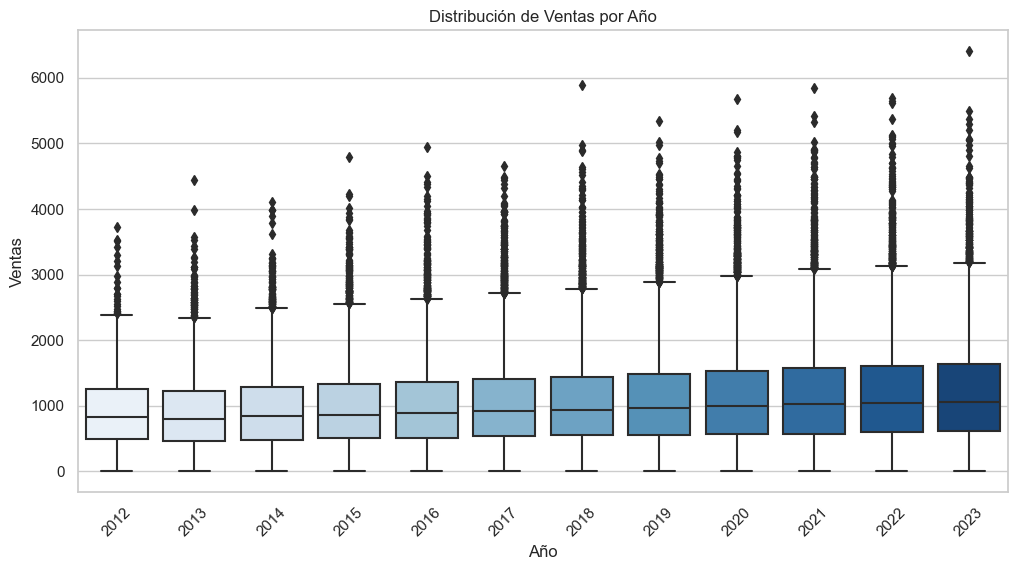

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6)) 
sns.boxplot(x='año', y='ventas', data=df, palette='Blues')

plt.title('Distribución de Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')

plt.xticks(rotation=45)  
plt.show()


**Distribución de ventas por mes:**

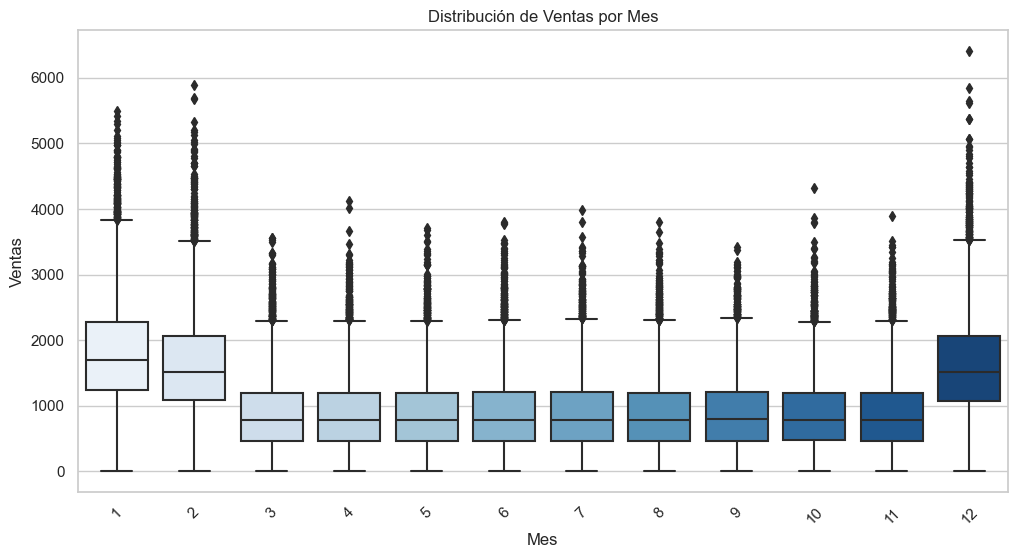

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6)) 
sns.boxplot(x='mes', y='ventas', data=df, palette='Blues')

plt.title('Distribución de Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')

plt.xticks(rotation=45)  
plt.show()


**Precio promedio por año:**

In [10]:
precio_promedio_por_año = df.groupby('año')['precio_promedio'].mean().reset_index()


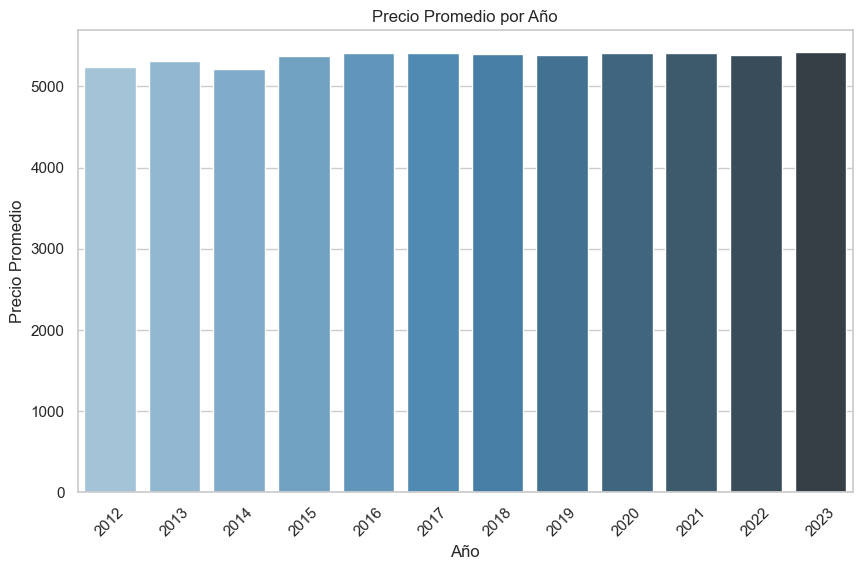

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='precio_promedio', data=precio_promedio_por_año, palette="Blues_d")

plt.title('Precio Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  

plt.show()


**Precio promedio por mes:**

In [12]:
precio_promedio_por_mes = df.groupby('mes')['precio_promedio'].mean().reset_index()

In [13]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
precio_promedio_por_mes['mes'] = precio_promedio_por_mes['mes'].apply(lambda x: meses[x-1])


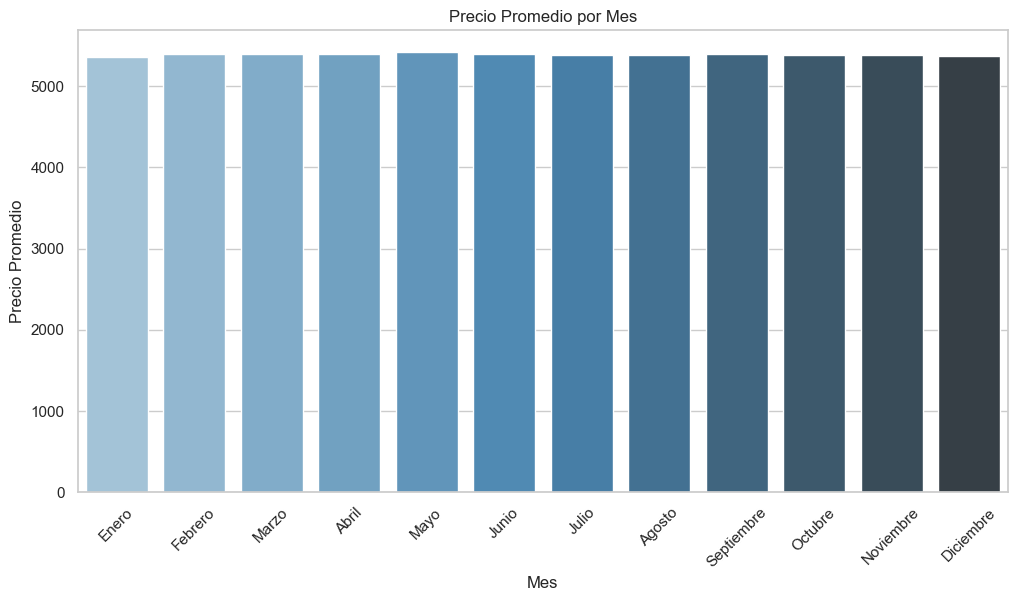

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='precio_promedio', data=precio_promedio_por_mes, palette="Blues_d")

plt.title('Precio Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)

plt.show()


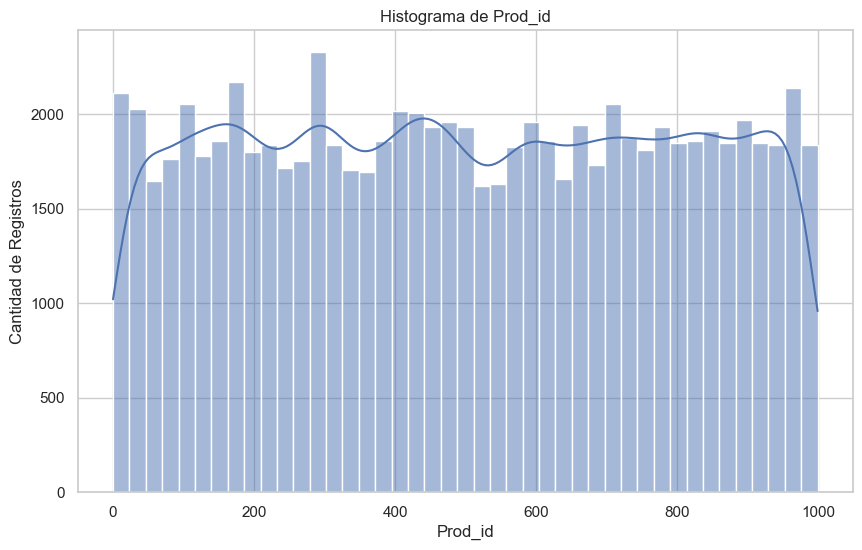

In [15]:
# Histograma de Prod_id
plt.figure(figsize=(10,6))
sns.histplot(df['prod_id'], kde=True)
plt.title('Histograma de Prod_id')
plt.xlabel('Prod_id')
plt.ylabel('Cantidad de Registros')
plt.show()

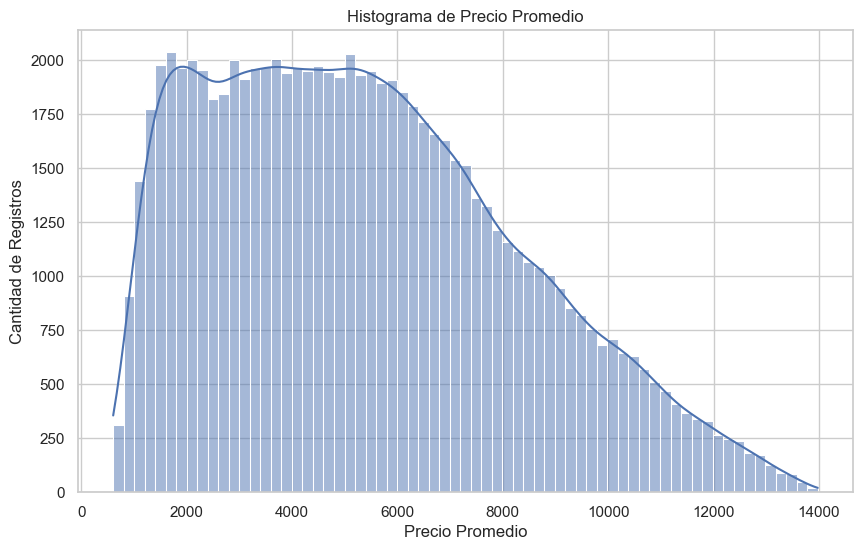

In [16]:
# Histograma de Precio Promedio
plt.figure(figsize=(10, 6))
sns.histplot(df['precio_promedio'], kde=True)
plt.title('Histograma de Precio Promedio')
plt.xlabel('Precio Promedio')
plt.ylabel('Cantidad de Registros')
plt.show()

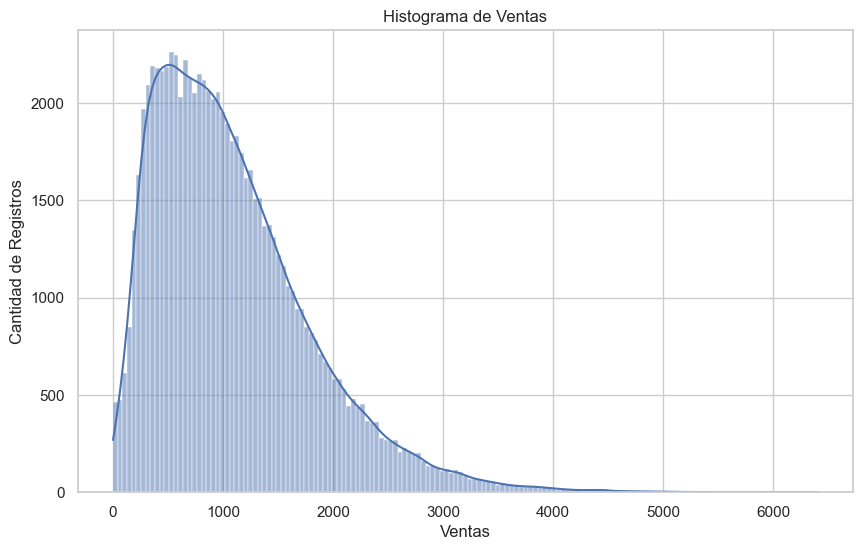

In [17]:
# Histograma de Ventas
plt.figure(figsize=(10, 6))
sns.histplot(df['ventas'], kde=True)
plt.title('Histograma de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Cantidad de Registros')
plt.show()

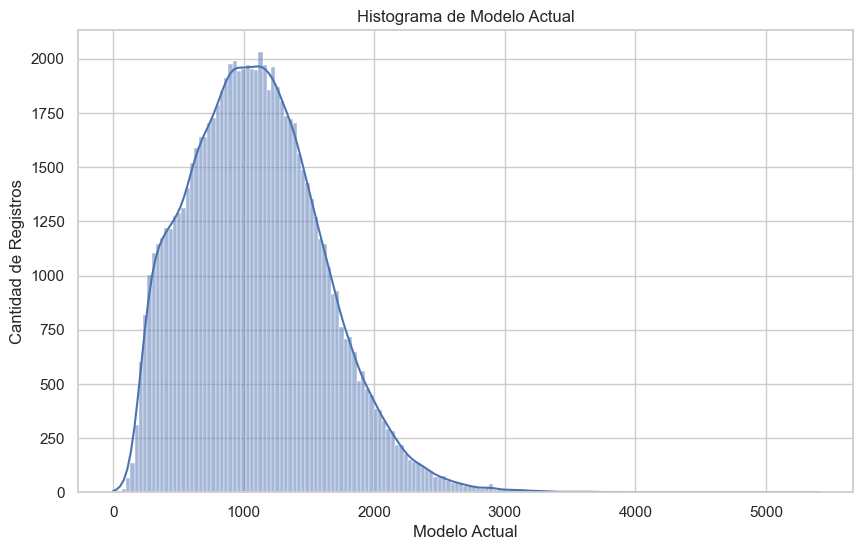

In [18]:
# Histograma de Modelo Actual
plt.figure(figsize=(10, 6))
sns.histplot(df['modelo_actual'], kde=True)
plt.title('Histograma de Modelo Actual')
plt.xlabel('Modelo Actual')
plt.ylabel('Cantidad de Registros')
plt.show()

### **Comparación de las ventas totales vs el modelo_actual**:

In [19]:

ventas_agregadas = df.groupby('fecha')['ventas'].sum()

modelo_actual_agregado = df.groupby('fecha')['modelo_actual'].sum()


#### Visualización de Serie de Tiempo de ventas totales y modelo actual por cada fecha:

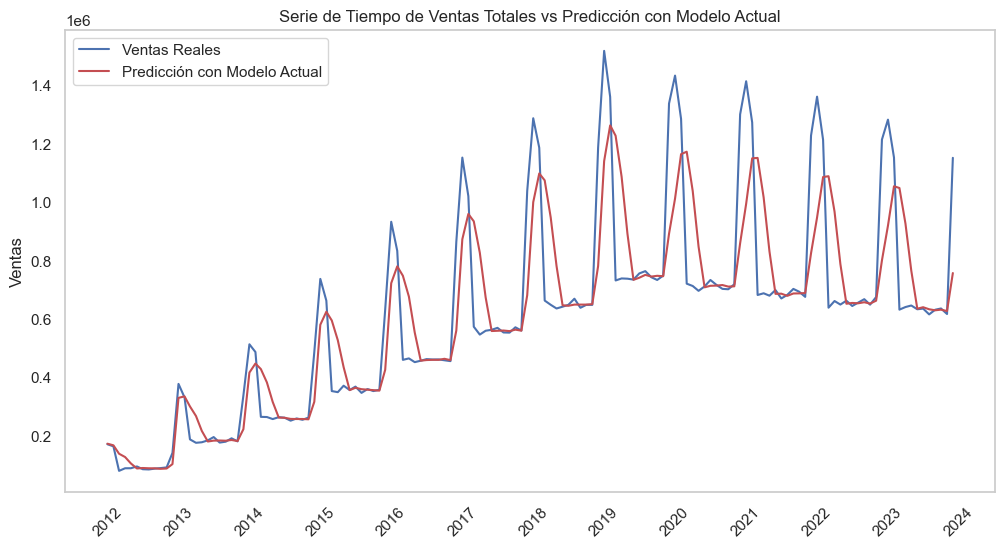

In [20]:
plt.figure(figsize=(12, 6))

# Ventas Totales
plt.plot(ventas_agregadas, label='Ventas Reales', color='b')

# Modelo Actual
plt.plot(modelo_actual_agregado, label='Predicción con Modelo Actual', color='r')

plt.title('Serie de Tiempo de Ventas Totales vs Predicción con Modelo Actual')
plt.ylabel('Ventas')
plt.legend()
plt.grid()

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

plt.show()


### Análisis de los últimos 36 meses:

In [21]:
fecha_final = ventas_agregadas.index.max()
fecha_inicio = fecha_final - pd.DateOffset(months=36)
ventas_ultimos_36 = ventas_agregadas[fecha_inicio:fecha_final]
modelo_actual_ultimos_36 = modelo_actual_agregado[fecha_inicio:fecha_final]


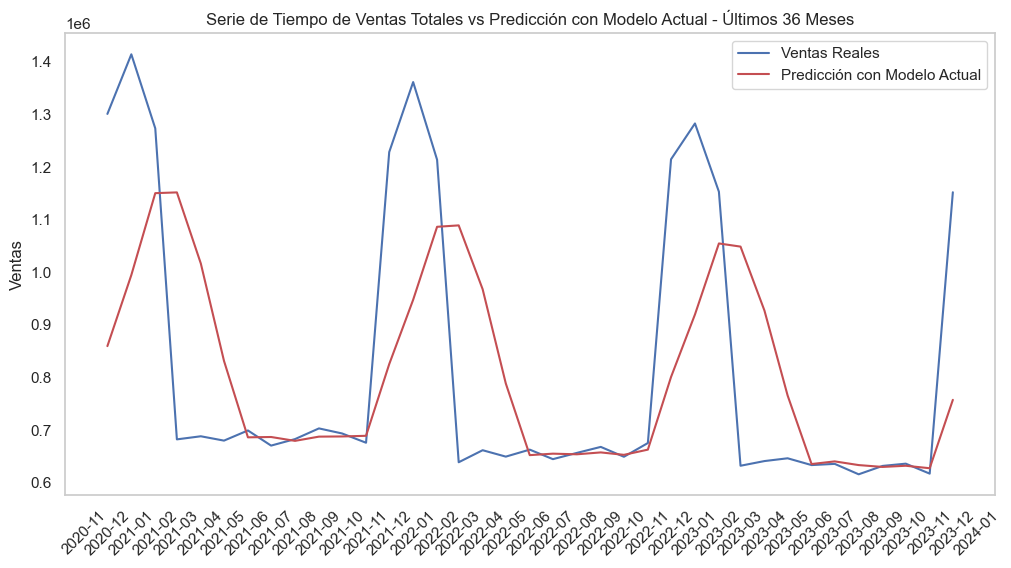

In [22]:
plt.figure(figsize=(12, 6))

# Ventas Totales
plt.plot(ventas_ultimos_36, label='Ventas Reales', color='b')

# Modelo Actual
plt.plot(modelo_actual_ultimos_36, label='Predicción con Modelo Actual', color='r')

plt.title('Serie de Tiempo de Ventas Totales vs Predicción con Modelo Actual - Últimos 36 Meses')
plt.ylabel('Ventas')
plt.legend()
plt.grid()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)

plt.show()

In [23]:
ventas_mensuales = df.groupby(['año', 'mes'])['ventas'].sum().unstack(fill_value=0)


In [24]:
ventas_mensuales.index = ventas_mensuales.index.astype(int)
meses_dict = {
    '01': 'Enero', '02': 'Febrero', '03': 'Marzo', '04': 'Abril',
    '05': 'Mayo', '06': 'Junio', '07': 'Julio', '08': 'Agosto',
    '09': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'
}
ventas_mensuales.rename(columns=meses_dict, inplace=True)


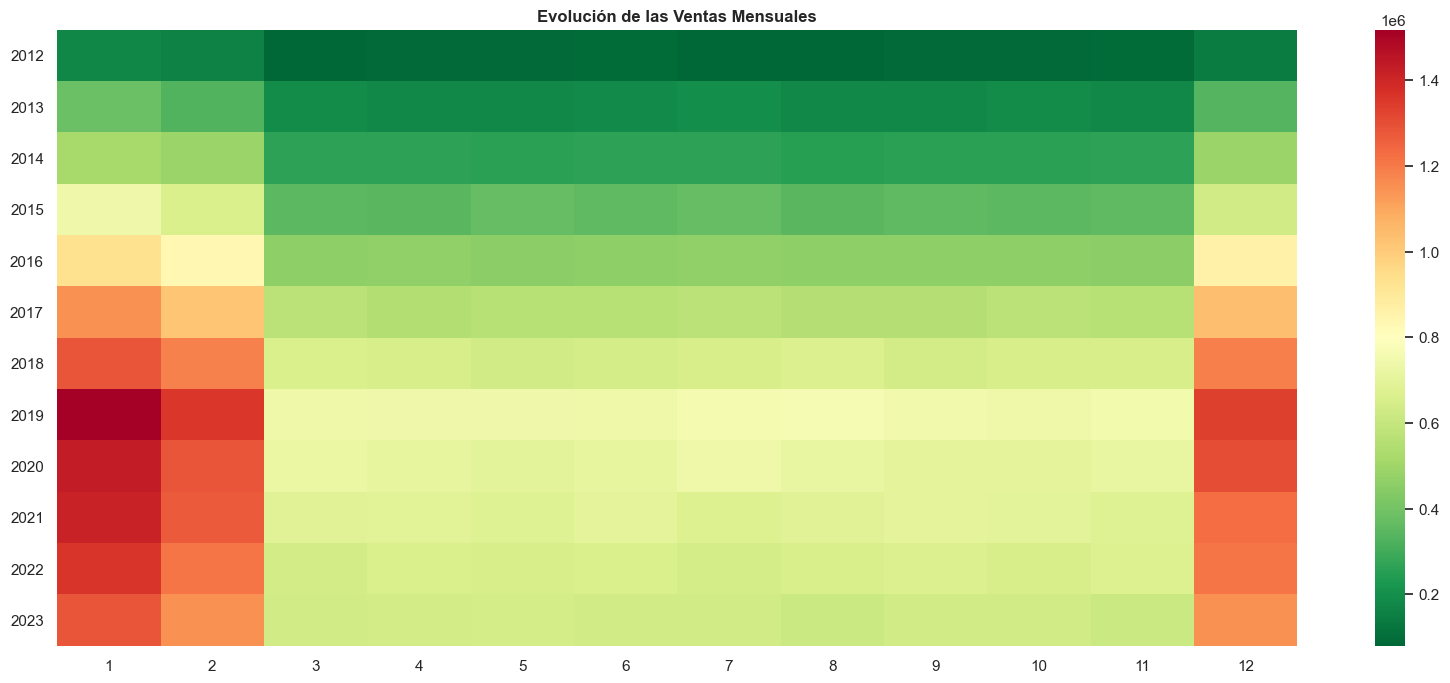

In [25]:
# Heatmap ventas mensuales
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
custom_cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
sns.heatmap(ventas_mensuales, ax=ax, cmap=custom_cmap)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Evolución de las Ventas Mensuales', fontsize=12, fontweight=700)

plt.show()


Como se puede observar en las visualizaciones anteriores, existe estacionalidad en la serie de tiempo de las ventas, manifestándose en patrones o ciclos de mayor ventas en diciembre, enero y febrero, repitiéndose año a año de forma regular a lo largo del tiempo. 
Lo anterior es característico de los productos agrícolas, debido a los ciclos de cultivo, las temporadas de cosecha y las variaciones estacionales en la demanda de los consumidores, influyendo directamente en las ventas.

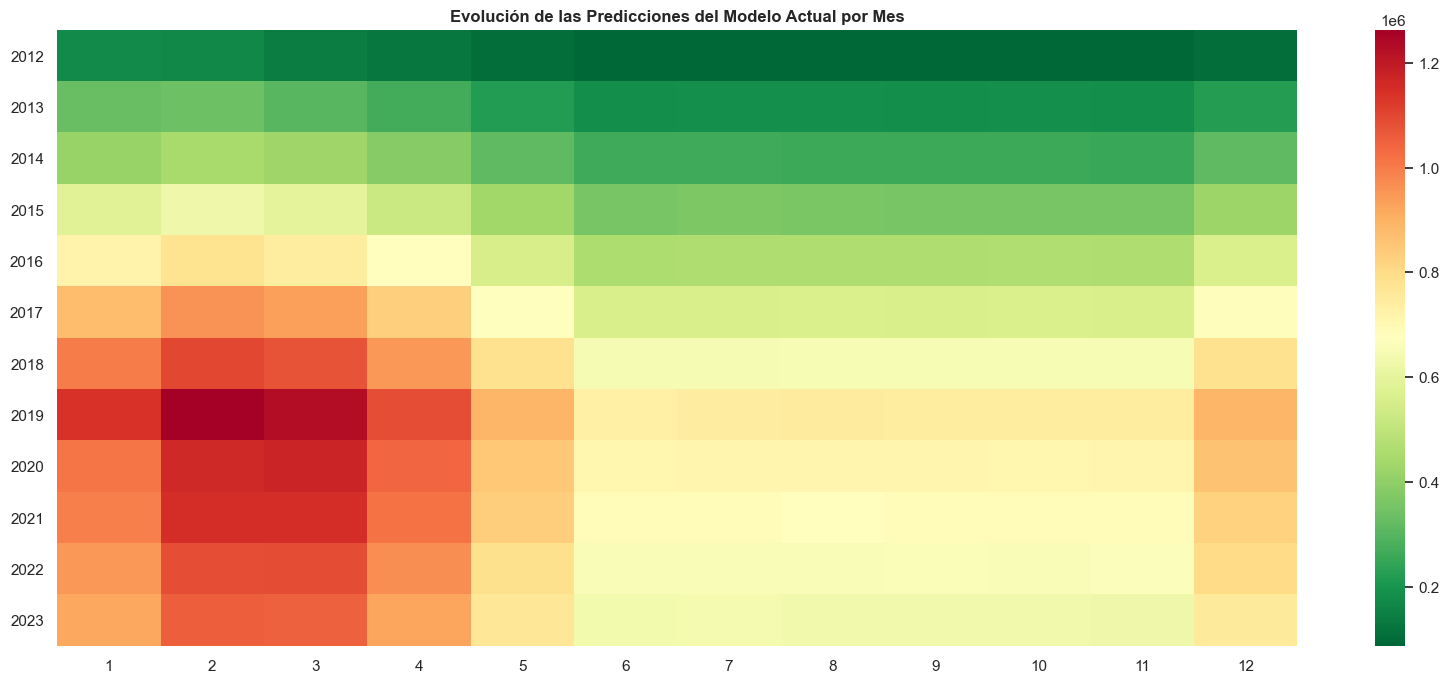

In [26]:
modelo_actual_mensual = df.groupby(['año', 'mes'])['modelo_actual'].sum().unstack(fill_value=0)

modelo_actual_mensual.index = modelo_actual_mensual.index.astype(int)

modelo_actual_mensual.rename(columns=meses_dict, inplace=True)

# Heatmap proyección modelo actual
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
custom_cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
sns.heatmap(modelo_actual_mensual, ax=ax, cmap=custom_cmap)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Evolución de las Predicciones del Modelo Actual por Mes', fontsize=12, fontweight=700)

plt.show()


Text(0.5, 1.02, 'Pairplot de Variables Numéricas')

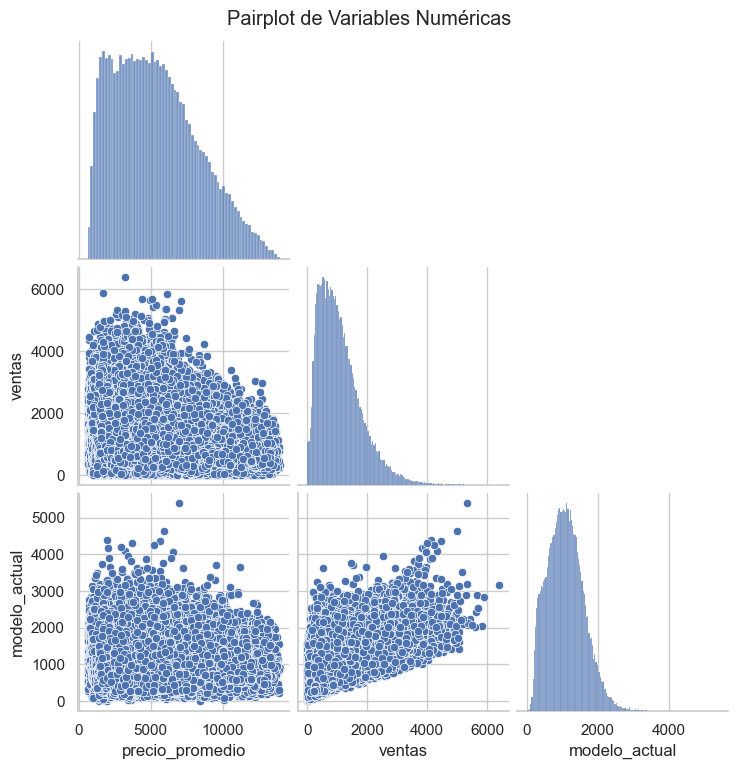

In [27]:
variables_numericas = ['precio_promedio', 'ventas', 'modelo_actual']  

# Pairplot
scatter_matrix = sns.pairplot(df, vars=variables_numericas, corner=True)

scatter_matrix.fig.suptitle("Pairplot de Variables Numéricas", y=1.02)  # Ajusta el título y su posición


Comparación del modelo actual vs ventas reales:
El modelo actual no está ajustado perfectamente a la distribución de los datos de ventas reales, específicamente el modelo actual podría estar subestimando la posibilidad de ocurrencia de valores de ventas muy altos.

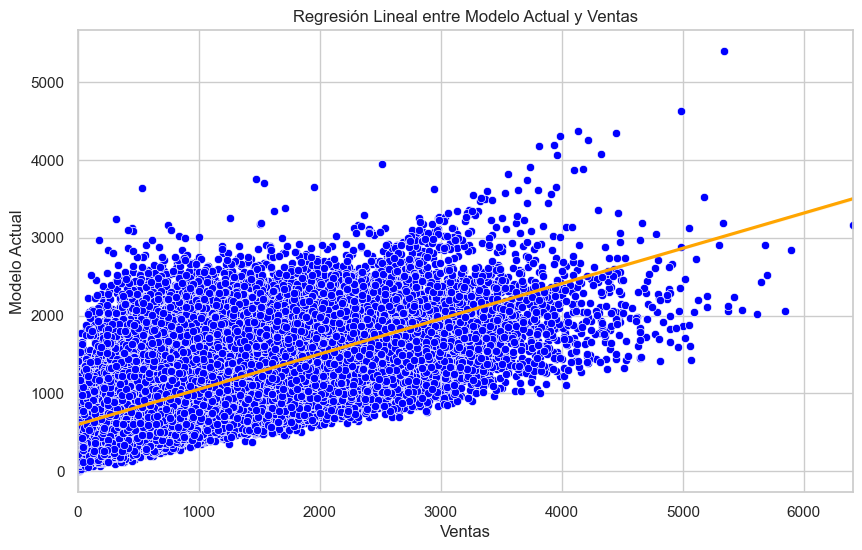

In [28]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='ventas', y='modelo_actual', data=df, color='blue')

sns.regplot(x='ventas', y='modelo_actual', data=df, scatter=False, color='orange', ci=95)

plt.xlabel("Ventas")
plt.ylabel("Modelo Actual")
plt.title("Regresión Lineal entre Modelo Actual y Ventas")

plt.show()




#### Visualización de Serie de Tiempo de ventas de productos en particular vs modelo actual por cada fecha:

##### Prod_id = 0

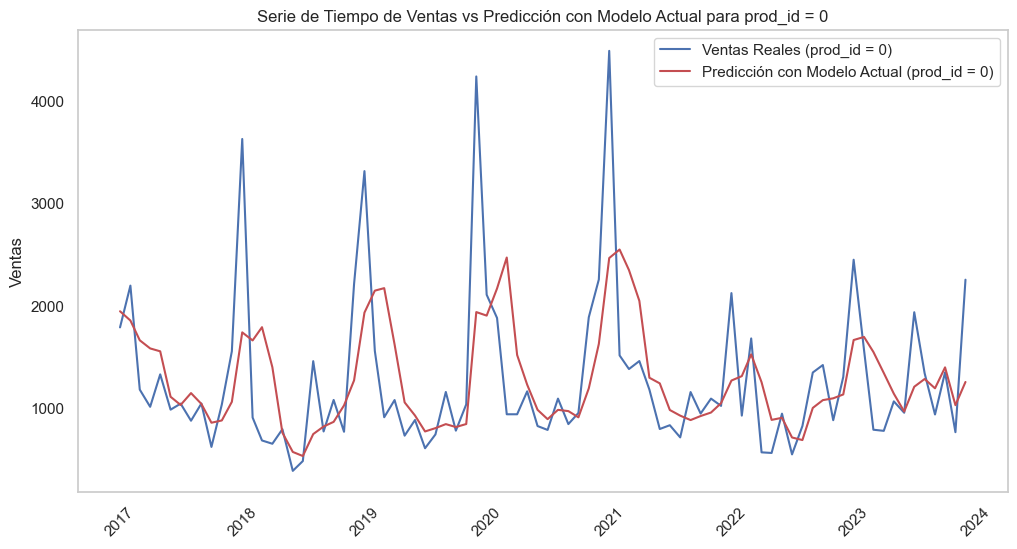

In [29]:
df_prod_0 = df[df['prod_id'] == 0]

ventas_prod_0 = df_prod_0.groupby('fecha')['ventas'].sum()

modelo_actual_prod_0 = df_prod_0.groupby('fecha')['modelo_actual'].sum()

plt.figure(figsize=(12, 6))

plt.plot(ventas_prod_0, label='Ventas Reales (prod_id = 0)', color='b')

plt.plot(modelo_actual_prod_0, label='Predicción con Modelo Actual (prod_id = 0)', color='r')

plt.title('Serie de Tiempo de Ventas vs Predicción con Modelo Actual para prod_id = 0')
plt.ylabel('Ventas')
plt.legend()
plt.grid()

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

plt.show()

## __4. Preprocesamiento de los datos__:
- Limpieza de datos.
- Manejo de valores faltantes.
- Normalización de features.
- Codificación cíclica para el feature 'mes'.
- Cálculo BIC y AIC.
- Clustering con GMM
- Validación de clustering.
- Preparación de datos para LSTM.
- División de los datos de entrenamiento y prueba para cada cluster.

No hay valores nulos en los features iniciales del dataset

**Eliminación de la columna 'modelo_actual' en el DataFrame**

In [30]:
df = df.drop(['modelo_actual'], axis=1)

In [31]:
df.dtypes

fecha              datetime64[ns]
prod_id                     int64
precio_promedio           float64
ventas                    float64
año                         int32
mes                         int32
dtype: object

In [32]:
df.head()

,fecha,prod_id,precio_promedio,ventas,año,mes
0,2017-01-01,0,6651.737920,1786.0,2017,1
1,2017-02-01,0,4919.698602,2194.0,2017,2
2,2017-03-01,0,3277.484704,1178.0,2017,3
3,2017-04-01,0,5906.864332,1010.0,2017,4
4,2017-05-01,0,4662.644018,1327.0,2017,5


In [33]:
df.describe()

,fecha,prod_id,precio_promedio,ventas,año,mes
count,80748,80748.000000,80748.000000,80748.000000,80748.000000,80748.000000
mean,2019-01-22 09:28:48.577797376,498.788379,5386.770862,1089.565958,2018.601872,6.500000
min,2012-01-01 00:00:00,0.000000,606.335817,0.000000,2012.000000,1.000000
25%,2016-12-01 00:00:00,248.000000,3018.438689,547.000000,2016.000000,3.750000
50%,2019-04-01 00:00:00,494.000000,5079.052675,954.000000,2019.000000,6.500000
75%,2021-06-01 00:00:00,751.000000,7336.782635,1468.000000,2021.000000,9.250000
max,2023-12-01 00:00:00,999.000000,13978.011657,6404.000000,2023.000000,12.000000
std,NaN,290.397741,2893.919808,716.509618,2.915747,3.452074


**Normalización de características**:

In [39]:
scaler = MinMaxScaler()
precio_promedio_scaled= scaler.fit_transform(df[['precio_promedio']])
ventas_scaled = scaler.fit_transform(df[['ventas']])


In [40]:
df_scaled = pd.DataFrame(precio_promedio_scaled,columns=['precio_promedio_scaled'])
df_scaled['ventas_scaled'] = scaler.fit_transform(df[['ventas']])
df_scaled['fecha'] = df['fecha']
df_scaled['prod_id'] = df['prod_id']
df_scaled['año'] = df['año']
df_scaled['mes'] = df['mes']

In [41]:
df_scaled.head()

,precio_promedio_scaled,ventas_scaled,fecha,prod_id,año,mes
0,0.452105,0.278888,2017-01-01,0,2017,1
1,0.322575,0.342598,2017-02-01,0,2017,2
2,0.199762,0.183948,2017-03-01,0,2017,3
3,0.396400,0.157714,2017-04-01,0,2017,4
4,0.303351,0.207214,2017-05-01,0,2017,5


In [42]:
df_scaled.shape

(80748, 6)

**Codificación cíclica para el feature 'mes'**:
 Según lo analizado en EDA, en Diciembre, Enero y Febrero históricamente hay mayor cantidad de ventas.

In [116]:
df_scaled['mes_sin'] = np.sin(2 * np.pi * df_scaled['mes'] / 12)
df_scaled['mes_cos'] = np.cos(2 * np.pi * df_scaled['mes'] / 12)

In [118]:
df_scaled.head()

,precio_promedio_scaled,ventas_scaled,fecha,prod_id,año,mes,cluster,mes_sin,mes_cos
56064,0.573880,0.068082,2012-01-01,698,2012,1,2,0.5,0.866025
23340,0.282569,0.176296,2012-01-01,288,2012,1,2,0.5,0.866025
27180,0.316844,0.127889,2012-01-01,331,2012,1,2,0.5,0.866025
75084,0.878002,0.219863,2012-01-01,931,2012,1,2,0.5,0.866025
42972,0.417910,0.240475,2012-01-01,530,2012,1,2,0.5,0.866025


Es complejo manejar un conjunto de datos de series temporales que incluye 1000 productos diferentes. Cada producto puede tener su patrón de ventas único, lo que puede hacer que un modelo único para todos los productos no sea el más adecuado.

Lo ideal sería realizar un modelo único para cada producto, sin embargo es costoso computacionalmente hablando. De forma alternativa, se realizará agruparan los productos basándose en el precio promedio y sus ventas.

- Para ello, en primer lugar se realizará el clustering de los productos utilizando el modelo **Gaussian Mixture Model (GMM)**, el cual se intuye que podría tener un buen comportamiento considerando la distribución de precios uniforme.

- Será necesario definir el número de componentes de precio promedio a utilizar en el modelo GMM, bajo el criterio del **cálculo de BIC y AIC**.




**Definición de número de clusters (Cálculo de BIC y AIC)**:
- BIC: Bayessian Information Criterion
- AIC: Akaike Information Criterion

In [120]:
datos_para_clustering = df_scaled[['precio_promedio_scaled', 'ventas_scaled','mes_sin','mes_cos']].values

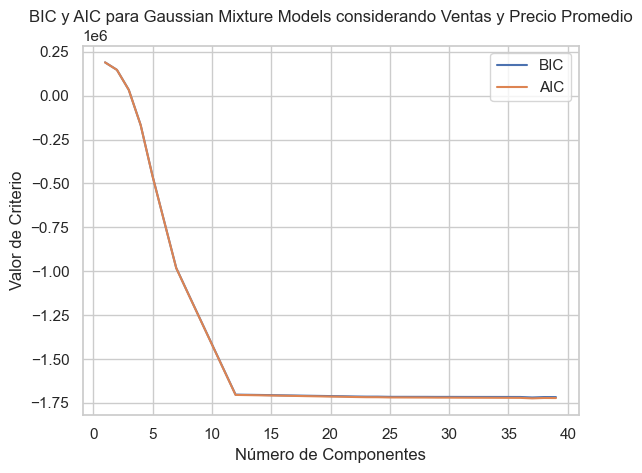

In [121]:
n_components = np.arange(1, 40)  
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(datos_para_clustering) for n in n_components]

# Calculo de BIC y AIC
bics = [model.bic(datos_para_clustering) for model in models]
aics = [model.aic(datos_para_clustering) for model in models]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend()
plt.xlabel('Número de Componentes')
plt.ylabel('Valor de Criterio')
plt.title('BIC y AIC para Gaussian Mixture Models considerando Ventas y Precio Promedio')
plt.show()

El cálculo de AIC y BIC sugiere que agrupar los datos en 12 clusters será el mejor equilibrio entre ajuste y complejidad para este problema.

**Clustering de los productos basándose en sus precios promedio y ventas (GMM)**:

In [122]:
gmm = GaussianMixture(n_components=12, random_state=0).fit(datos_para_clustering)
df_scaled['cluster'] = gmm.predict(datos_para_clustering)

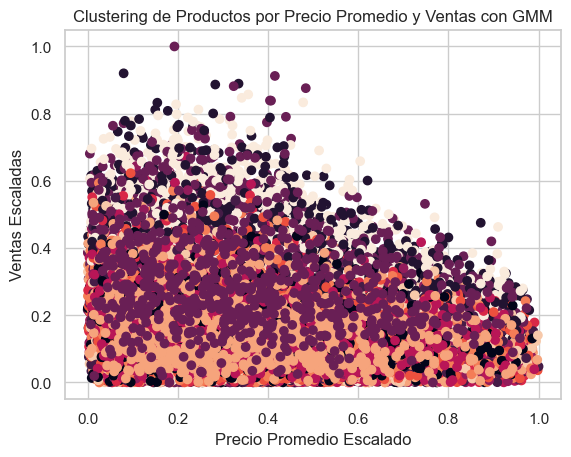

In [124]:
plt.scatter(df_scaled['precio_promedio_scaled'], df_scaled['ventas_scaled'], c=df_scaled['cluster'])
plt.xlabel('Precio Promedio Escalado')
plt.ylabel('Ventas Escaladas')
plt.title('Clustering de Productos por Precio Promedio y Ventas con GMM')
plt.show()

**Validación de Clusters (GMM)**:

In [127]:
df_scaled.head()

,precio_promedio_scaled,ventas_scaled,fecha,prod_id,año,mes,cluster,mes_sin,mes_cos
56064,0.573880,0.068082,2012-01-01,698,2012,1,11,0.5,0.866025
23340,0.282569,0.176296,2012-01-01,288,2012,1,11,0.5,0.866025
27180,0.316844,0.127889,2012-01-01,331,2012,1,11,0.5,0.866025
75084,0.878002,0.219863,2012-01-01,931,2012,1,11,0.5,0.866025
42972,0.417910,0.240475,2012-01-01,530,2012,1,11,0.5,0.866025


In [128]:
df_scaled.describe()

,precio_promedio_scaled,ventas_scaled,fecha,prod_id,año,mes,cluster,mes_sin,mes_cos
count,80748.000000,80748.000000,80748,80748.000000,80748.000000,80748.000000,80748.000000,8.074800e+04,8.074800e+04
mean,0.357505,0.170138,2019-01-22 09:28:48.577797632,498.788379,2018.601872,6.500000,5.500000,-1.971090e-17,-7.743568e-17
min,0.000000,0.000000,2012-01-01 00:00:00,0.000000,2012.000000,1.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,0.180389,0.085415,2016-12-01 00:00:00,248.000000,2016.000000,3.750000,2.750000,-5.915064e-01,-5.915064e-01
50%,0.334492,0.148969,2019-04-01 00:00:00,494.000000,2019.000000,6.500000,5.500000,-6.123234e-17,-6.123234e-17
75%,0.503336,0.229232,2021-06-01 00:00:00,751.000000,2021.000000,9.250000,8.250000,5.915064e-01,5.915064e-01
max,1.000000,1.000000,2023-12-01 00:00:00,999.000000,2023.000000,12.000000,11.000000,1.000000e+00,1.000000e+00
std,0.216422,0.111885,NaN,290.397741,2.915747,3.452074,3.452074,7.071112e-01,7.071112e-01


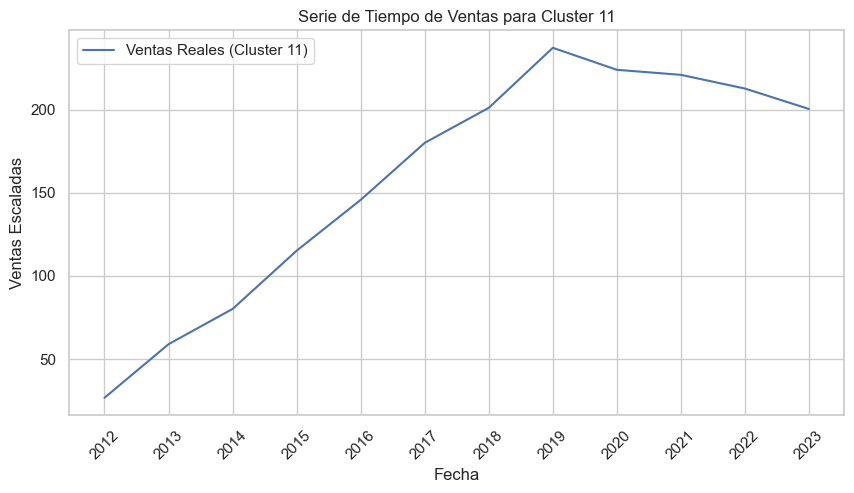

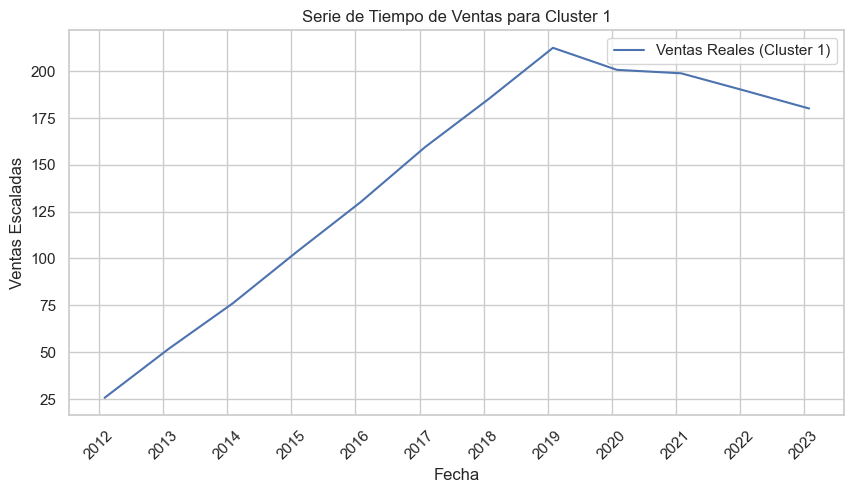

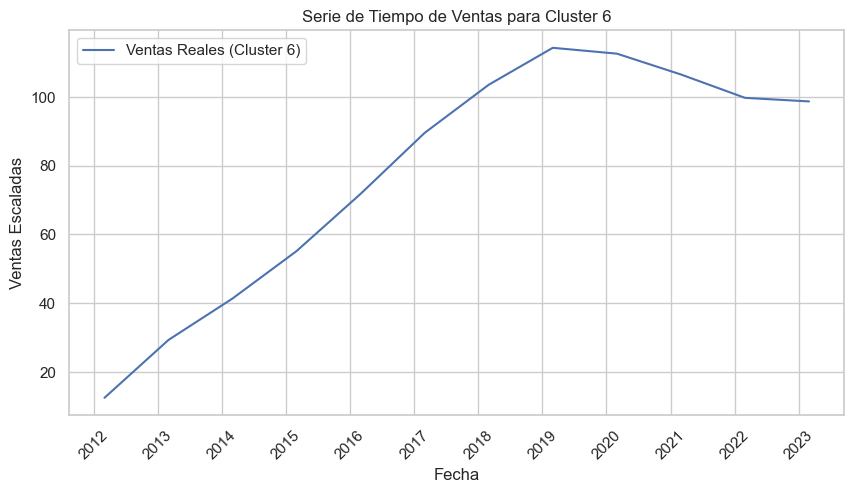

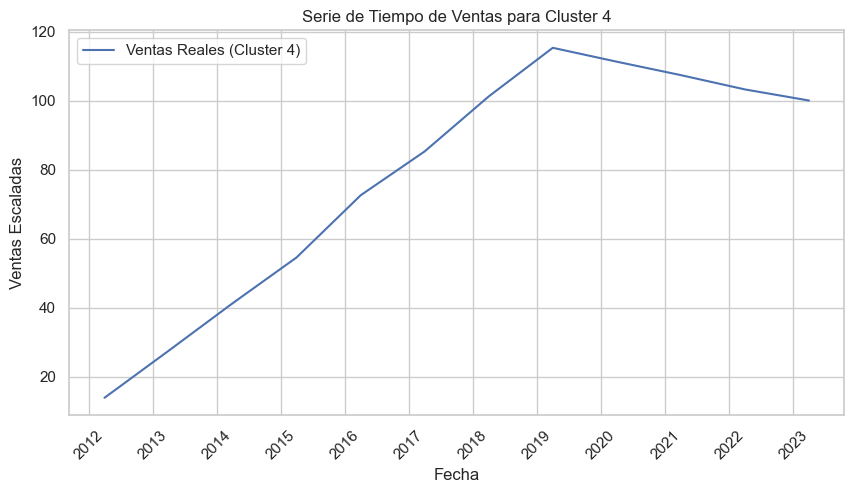

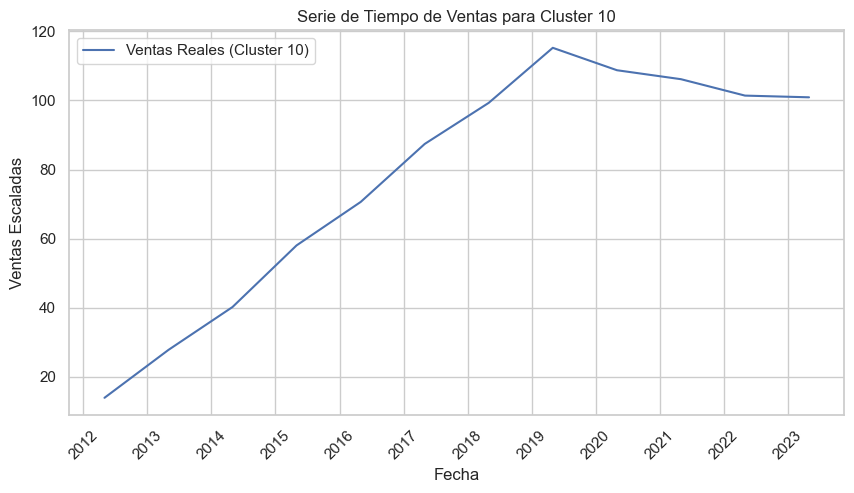

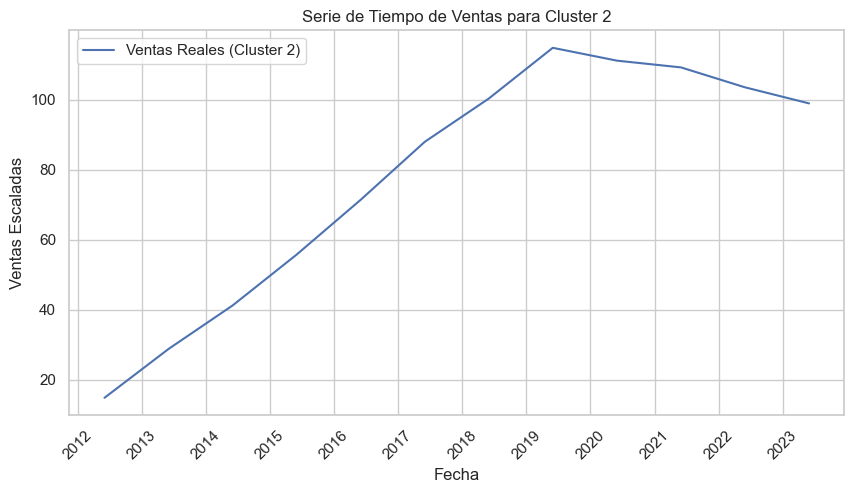

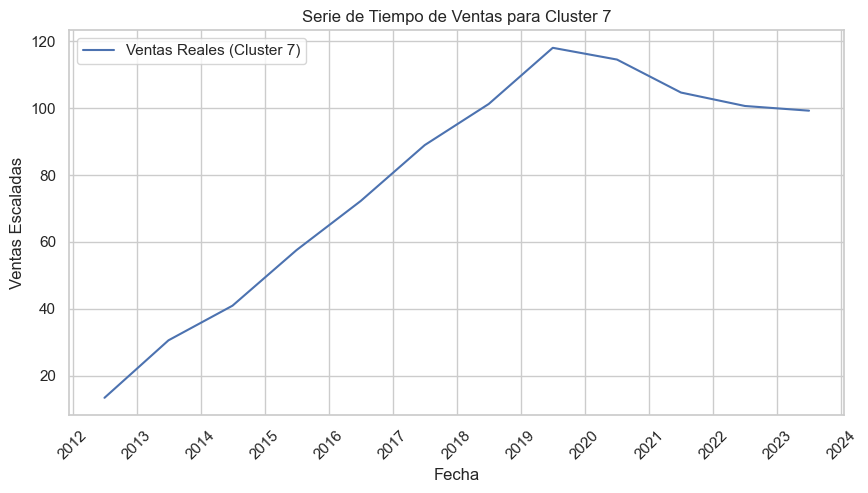

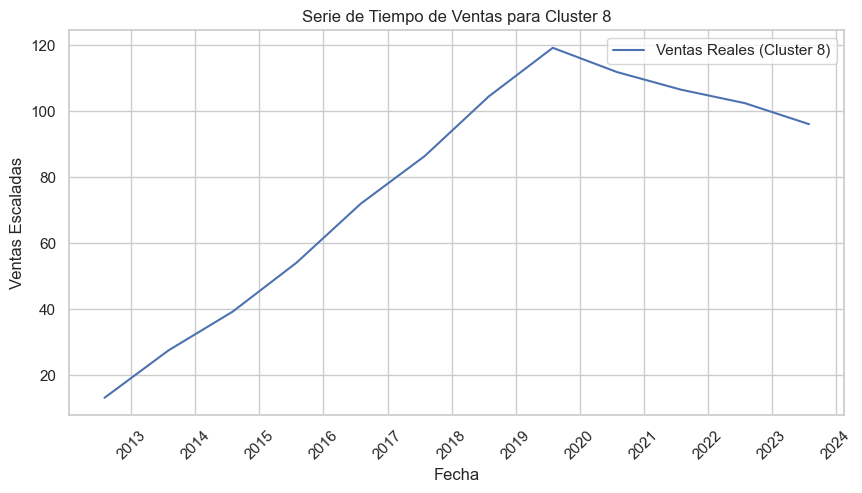

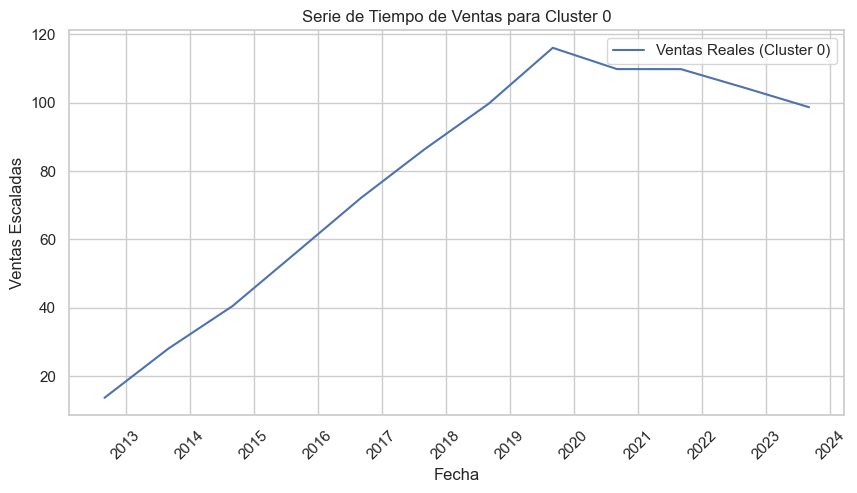

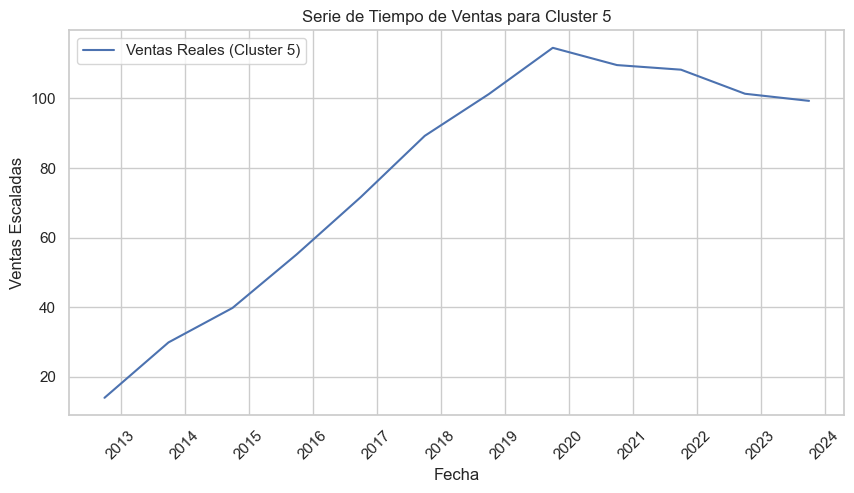

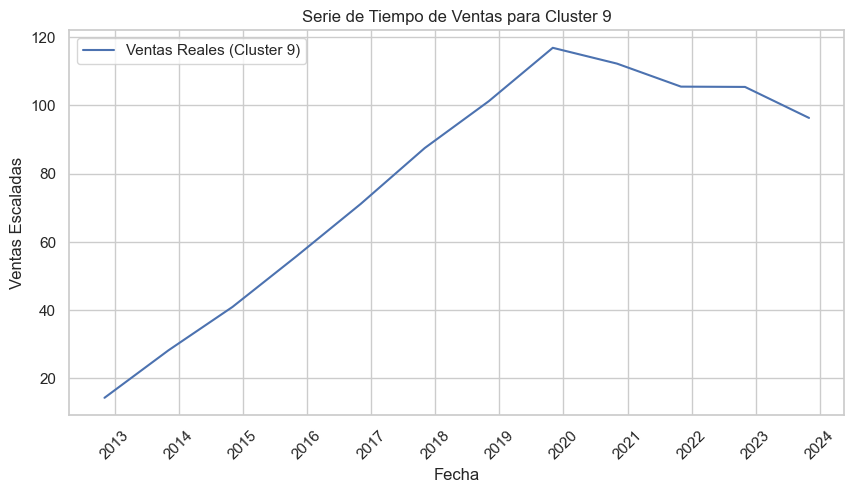

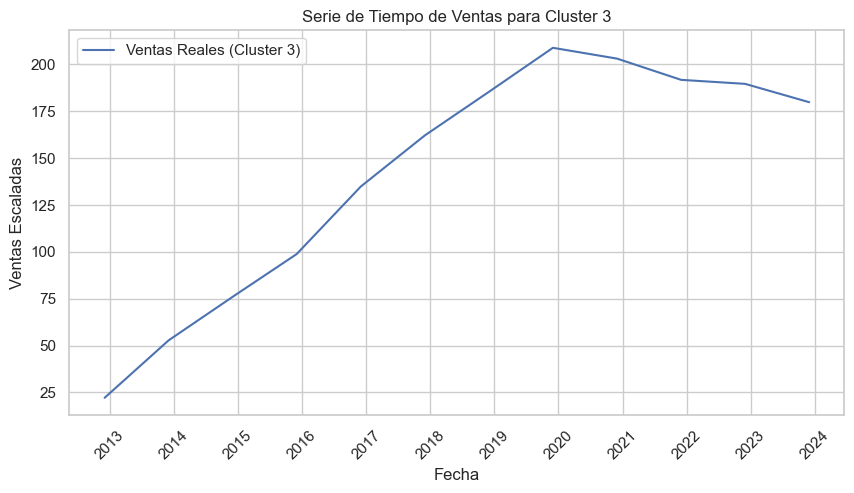

In [129]:
for cluster in df_scaled['cluster'].unique():
    df_scaled_cluster = df_scaled[df_scaled['cluster'] == cluster]

    ventas_cluster = df_scaled_cluster.groupby(['año', 'mes'])['ventas_scaled'].sum().reset_index()

    ventas_cluster.rename(columns={'año': 'year', 'mes': 'month'}, inplace=True)

    ventas_cluster['fecha_temp'] = pd.to_datetime(ventas_cluster[['year', 'month']].assign(day=1))

    plt.figure(figsize=(10, 5))
    plt.plot(ventas_cluster['fecha_temp'], ventas_cluster['ventas_scaled'], label=f'Ventas Reales (Cluster {cluster})', color='b')
    plt.title(f'Serie de Tiempo de Ventas para Cluster {cluster}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas Escaladas')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    plt.show()


En todos los clusters se aprecia correlación en las ventas desde el 2013 al segundo semestre del 2019, decayendo las ventas posteriormente.

Sin embargo, al analizar las visualizaciones anteriores, se puede decir que los clusters creados por el GMM son significativos, ya que reflejan diferencias en términos de ventas a lo largo del tiempo.

**Preparación de Datos**:



**Ventana de tiempo ha seleccionar para la proyección**: 'look_back'*
En el contexto de este problema, predicción de demanda de productos agrícolas con estacionalidad anual, se optará por considerar desde el año 2017 **(7 años ó 84 meses)**.



- Considerando que en el mundo agrícola, las tendencias y patrones de demanda pueden ser fuertemente estacionales y repetirse anualmente, se tomará en cuenta la información de los últimos dos años.
- No se eligirá un look_back mas amplio, privilegiando el rendimiento computacional.

In [131]:
look_back=84
def create_dataset(dataset, look_back=84):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, -1])
    return np.array(X), np.array(Y)


**División de los datos en Entrenamiento y Prueba para cada Cluster**:



In [133]:
df_scaled['cluster'].value_counts()

cluster
11    6729
1     6729
6     6729
4     6729
10    6729
2     6729
7     6729
8     6729
0     6729
5     6729
9     6729
3     6729
Name: count, dtype: int64

In [132]:
clusters_excluidos = []
X_train = {}
y_train = {}
X_test = {}
y_test = {}

for cluster in df_scaled['cluster'].unique():
    df_cluster = df_scaled[df_scaled['cluster'] == cluster]

    if len(df_cluster) <= look_back:
        print(f"Excluyendo cluster {cluster} por tener menos de {look_back + 1} datos.")
        clusters_excluidos.append(cluster)
        continue
    
    # Dividir los datos en entrenamiento y prueba
    df_train_cluster, df_test_cluster = train_test_split(df_cluster, test_size=0.2, shuffle=False, random_state=42)
    print(f"Cluster {cluster}: Entrenamiento {len(df_train_cluster)}, Prueba {len(df_test_cluster)}")

    train_array = df_train_cluster[['precio_promedio_scaled', 'ventas_scaled','mes_sin','mes_cos']].to_numpy()
    test_array = df_test_cluster[['precio_promedio_scaled', 'ventas_scaled','mes_sin','mes_cos']].to_numpy()
    
    X_train[cluster], y_train[cluster] = create_dataset(train_array, look_back)
    X_test[cluster], y_test[cluster] = create_dataset(test_array, look_back)



Cluster 11: Entrenamiento 5383, Prueba 1346
Cluster 1: Entrenamiento 5383, Prueba 1346
Cluster 6: Entrenamiento 5383, Prueba 1346
Cluster 4: Entrenamiento 5383, Prueba 1346
Cluster 10: Entrenamiento 5383, Prueba 1346
Cluster 2: Entrenamiento 5383, Prueba 1346
Cluster 7: Entrenamiento 5383, Prueba 1346


Cluster 8: Entrenamiento 5383, Prueba 1346
Cluster 0: Entrenamiento 5383, Prueba 1346
Cluster 5: Entrenamiento 5383, Prueba 1346
Cluster 9: Entrenamiento 5383, Prueba 1346
Cluster 3: Entrenamiento 5383, Prueba 1346


## __5. Selección, construcción, entrenamiento y evaluación de los modelos__:


- Se entrenará un modelo **Long Short Term Memory (LSTM)** para todos los clusters.

- De forma alternativa, se entrenará un modelo **GRU (Gated Recurrent Unit)** y un modelo **SARIMAX (Seasonal Autoregressive Integrate Moving Average)**, considerando la estacionalidad en los datos con variables exógenas.


__Construcción y entrenamiento del modelo LSTM__:


In [65]:
# Función para calcular rmse (raíz del error cuadrático medio)
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [135]:
models_LSTM = {}
history_LSTM = {}

for cluster in df_scaled['cluster'].unique():
    
    if cluster in clusters_excluidos:
        continue

    X_train_cluster, y_train_cluster = X_train[cluster], y_train[cluster]
    X_test_cluster, y_test_cluster = X_test[cluster], y_test[cluster]
    
    model_LSTM = Sequential()
    model_LSTM.add(LSTM(50, return_sequences=True, input_shape=(X_train_cluster.shape[1], X_train_cluster.shape[2])))
    model_LSTM.add(Dropout(0.2))
    model_LSTM.add(LSTM(50, return_sequences=False))
    model_LSTM.add(Dropout(0.2))
    model_LSTM.add(Dense(1))
    model_LSTM.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae',rmse])  
    
    history = model_LSTM.fit(X_train_cluster, y_train_cluster, epochs=10, batch_size=32, validation_data=(X_test_cluster, y_test_cluster), verbose=2)
    
    models_LSTM[cluster] = model_LSTM
    history_LSTM[cluster] = history


Epoch 1/10
166/166 - 49s - loss: 0.0862 - mae: 0.0862 - rmse: 0.1031 - val_loss: 0.0226 - val_mae: 0.0226 - val_rmse: 0.0231 - 49s/epoch - 294ms/step
Epoch 2/10
166/166 - 26s - loss: 0.0546 - mae: 0.0546 - rmse: 0.0679 - val_loss: 0.0234 - val_mae: 0.0234 - val_rmse: 0.0236 - 26s/epoch - 154ms/step
Epoch 3/10
166/166 - 28s - loss: 0.0488 - mae: 0.0488 - rmse: 0.0608 - val_loss: 0.0068 - val_mae: 0.0068 - val_rmse: 0.0071 - 28s/epoch - 166ms/step
Epoch 4/10
166/166 - 28s - loss: 0.0463 - mae: 0.0463 - rmse: 0.0577 - val_loss: 0.0262 - val_mae: 0.0262 - val_rmse: 0.0262 - 28s/epoch - 166ms/step
Epoch 5/10
166/166 - 27s - loss: 0.0456 - mae: 0.0456 - rmse: 0.0564 - val_loss: 0.0328 - val_mae: 0.0328 - val_rmse: 0.0328 - 27s/epoch - 163ms/step
Epoch 6/10
166/166 - 26s - loss: 0.0430 - mae: 0.0430 - rmse: 0.0537 - val_loss: 0.0170 - val_mae: 0.0170 - val_rmse: 0.0170 - 26s/epoch - 156ms/step
Epoch 7/10
166/166 - 32s - loss: 0.0410 - mae: 0.0410 - rmse: 0.0508 - val_loss: 0.0237 - val_mae: 0

In [136]:
y_pred = model_LSTM.predict(X_test_cluster)
y_true = y_test_cluster

40/40 [==============================] - 1s 20ms/step


In [137]:
for cluster in X_train.keys():  
    train_loss = model_LSTM.evaluate(X_train[cluster], y_train[cluster], batch_size=32)
    test_loss = model_LSTM.evaluate(X_test[cluster], y_test[cluster], batch_size=32)
    print(f'Cluster {cluster} - Training MAE: {train_loss}, Testing MAE: {test_loss}')


  9/166 [>.............................] - ETA: 2s - loss: 0.1030 - mae: 0.1030 - rmse: 0.1030

40/40 [==============================] - 1s 17ms/step - loss: 0.1028 - mae: 0.1028 - rmse: 0.1028
Cluster 11 - Training MAE: [0.10298524796962738, 0.10298524796962738, 0.10298609733581543], Testing MAE: [0.10278496891260147, 0.10278496891260147, 0.1027771383523941]
40/40 [==============================] - 1s 16ms/step - loss: 0.4210 - mae: 0.4210 - rmse: 0.4210
Cluster 1 - Training MAE: [0.4210836589336395, 0.4210836589336395, 0.4210816025733948], Testing MAE: [0.4210163950920105, 0.4210163950920105, 0.4210214614868164]
40/40 [==============================] - 1s 15ms/step - loss: 0.8111 - mae: 0.8111 - rmse: 0.8111
Cluster 6 - Training MAE: [0.8110111951828003, 0.8110111951828003, 0.8110067248344421], Testing MAE: [0.8111414909362793, 0.8111414909362793, 0.8110888600349426]
40/40 [==============================] - 1s 23ms/step - loss: 1.0199 - mae: 1.0199 - rmse: 1.0198
Cluster 4 - Training MAE: [1.0216891765594482, 1.0216891765594482, 1.0217479467391968], Testing MAE: [1.019949555397

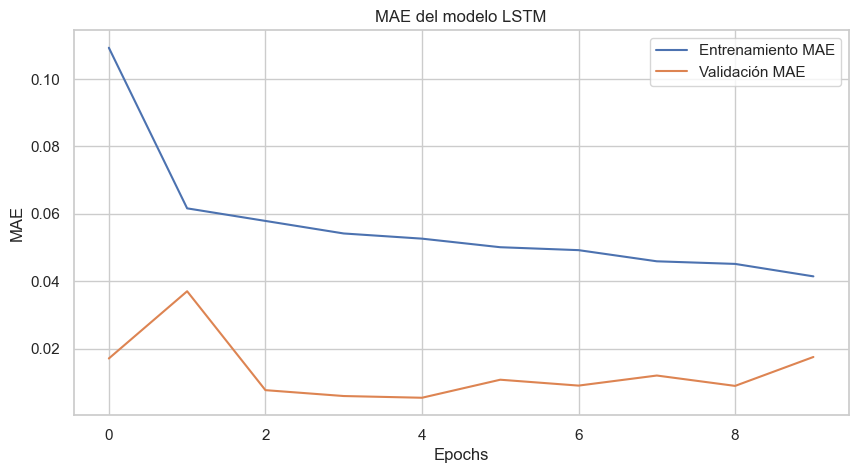

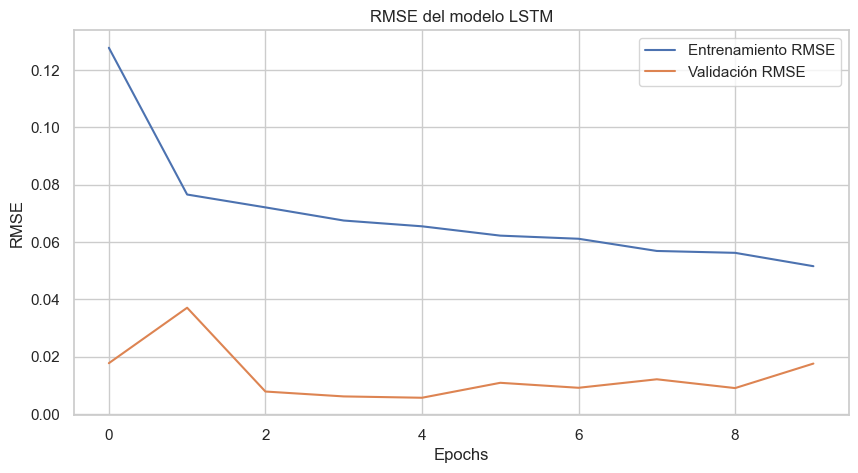

In [138]:
# MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Entrenamiento MAE')
plt.plot(history.history['val_mae'], label='Validación MAE')
plt.title('MAE del modelo LSTM')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# RMSE
plt.figure(figsize=(10, 5))
plt.plot(history.history['rmse'], label='Entrenamiento RMSE') 
plt.plot(history.history['val_rmse'], label='Validación RMSE')  
plt.title('RMSE del modelo LSTM')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

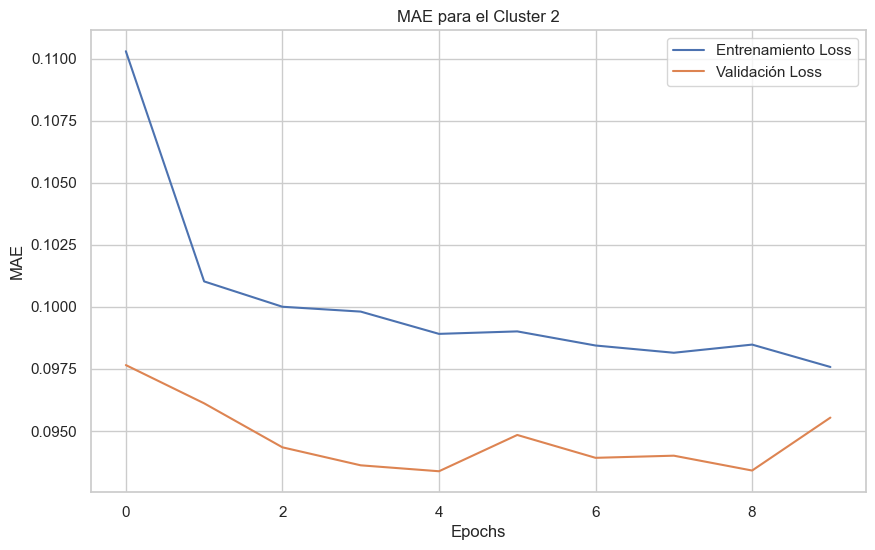

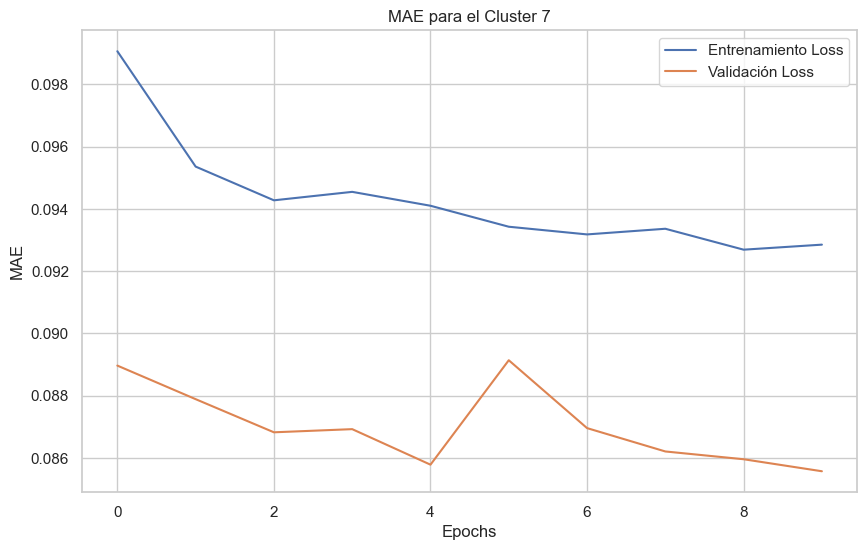

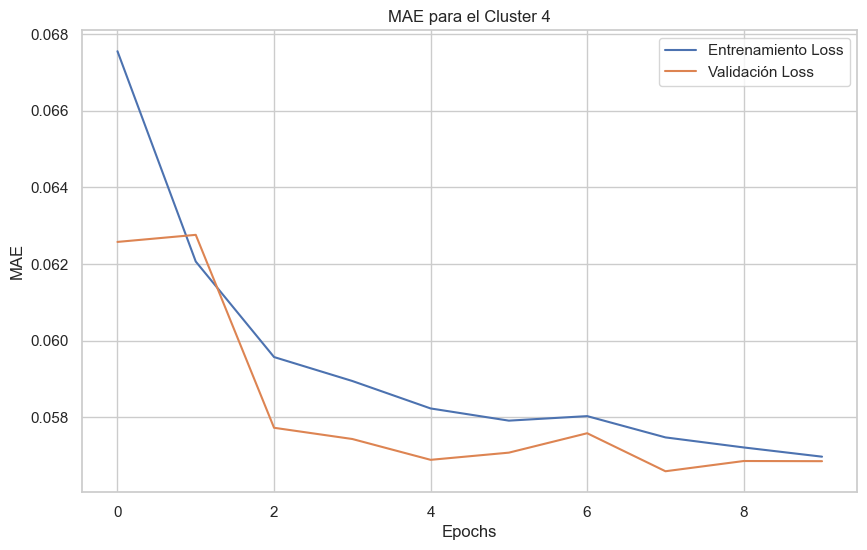

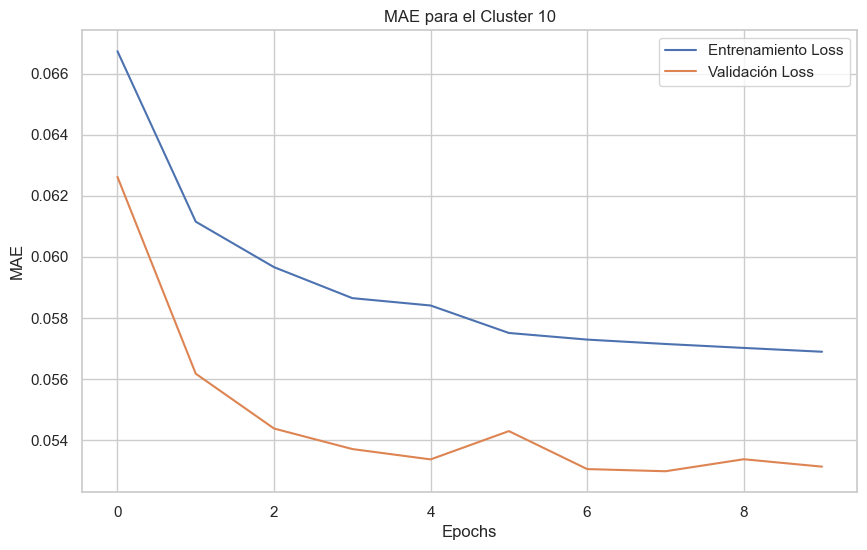

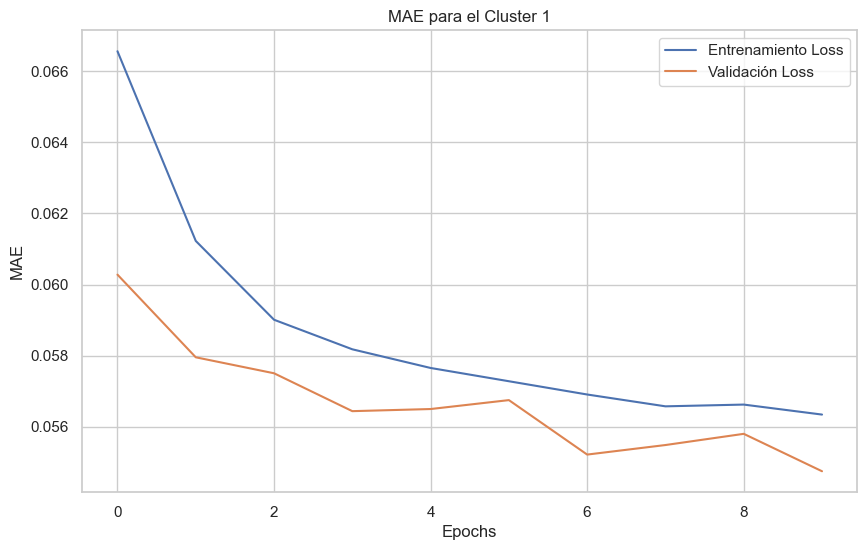

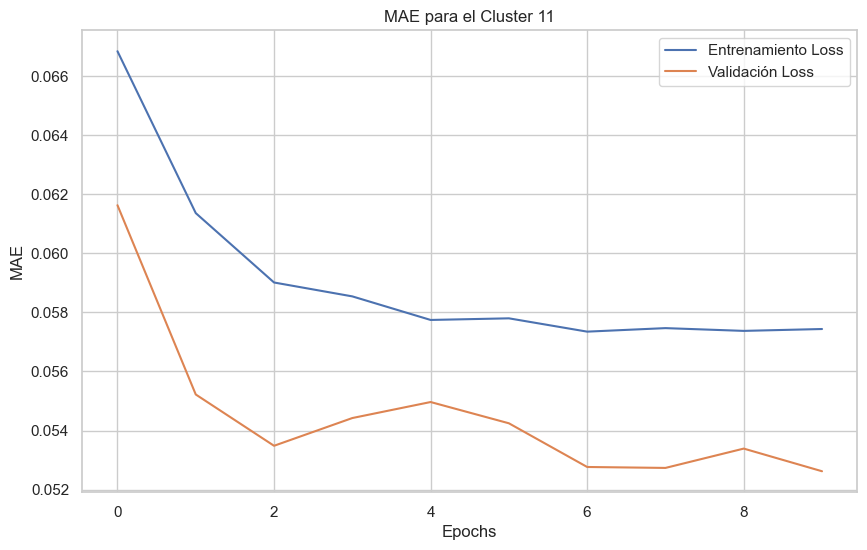

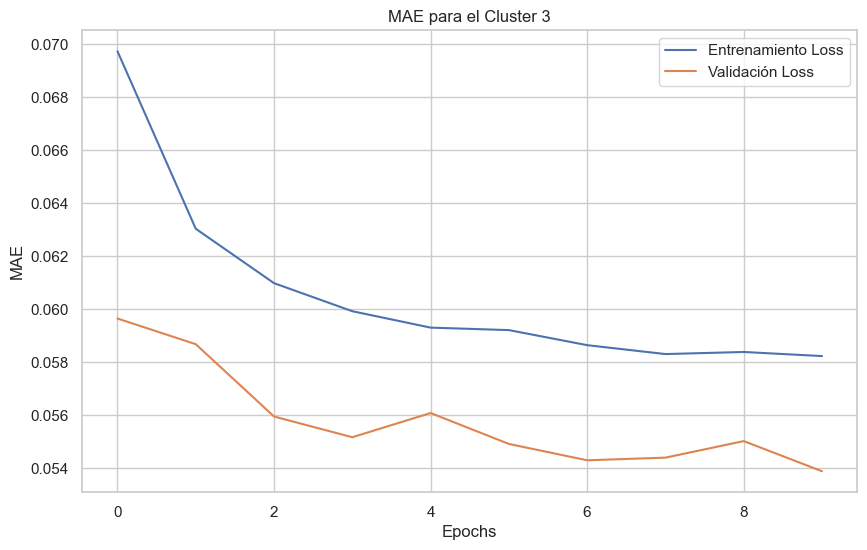

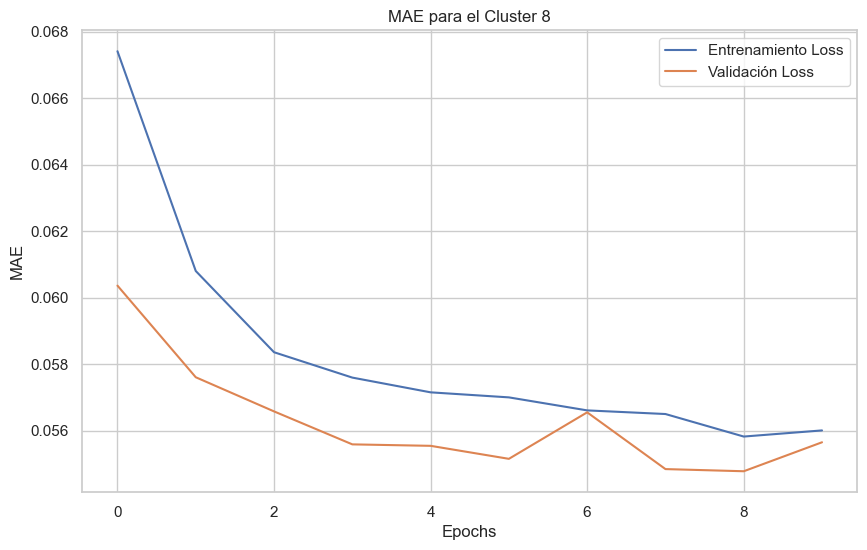

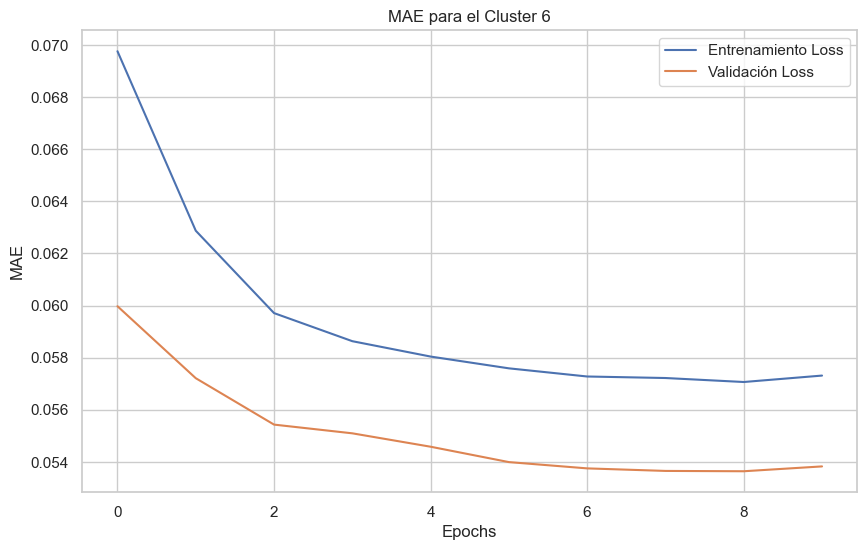

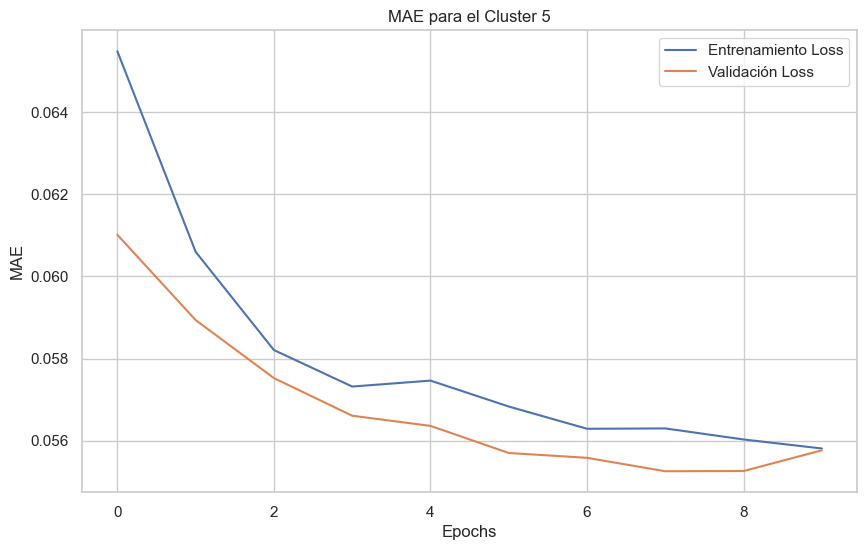

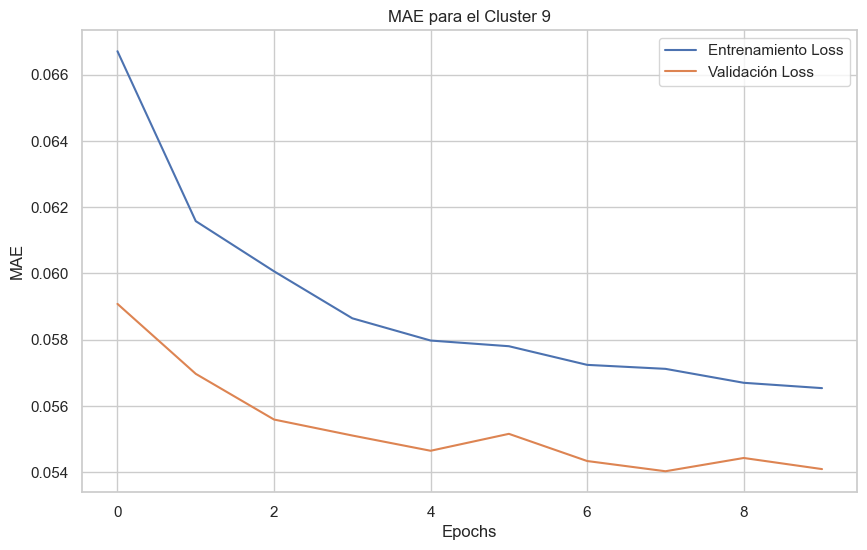

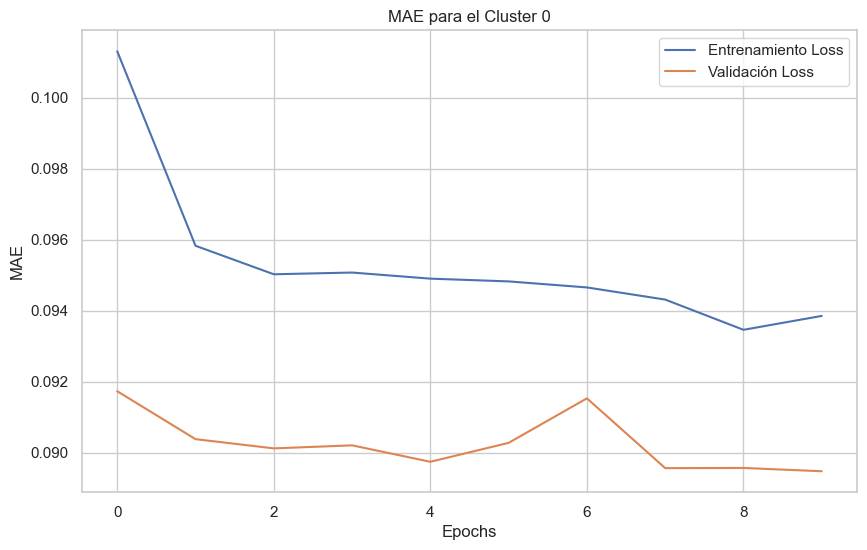

In [78]:
for cluster, history in history_LSTM.items():
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Entrenamiento Loss')
    plt.plot(val_loss, label='Validación Loss')
    plt.title(f'MAE para el Cluster {cluster}')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()
  


## __6. Predicción ventas 2024__:
__Predicción ventas 2024 con modelo LSTM__:


In [139]:
df_scaled.sort_values(by='fecha', inplace=True)

In [140]:
df_scaled.head()

,precio_promedio_scaled,ventas_scaled,fecha,prod_id,año,mes,cluster,mes_sin,mes_cos
56064,0.573880,0.068082,2012-01-01,698,2012,1,11,0.5,0.866025
62832,0.249688,0.382105,2012-01-01,780,2012,1,11,0.5,0.866025
70020,0.472913,0.217052,2012-01-01,868,2012,1,11,0.5,0.866025
77388,0.173880,0.337914,2012-01-01,959,2012,1,11,0.5,0.866025
74940,0.220589,0.219706,2012-01-01,930,2012,1,11,0.5,0.866025


In [149]:
df_scaled.describe()

,precio_promedio_scaled,ventas_scaled,fecha,prod_id,año,mes,cluster,mes_sin,mes_cos
count,80748.000000,80748.000000,80748,80748.000000,80748.000000,80748.000000,80748.000000,8.074800e+04,8.074800e+04
mean,0.357505,0.170138,2019-01-22 09:28:48.577797632,498.788379,2018.601872,6.500000,5.500000,-1.971090e-17,-7.743568e-17
min,0.000000,0.000000,2012-01-01 00:00:00,0.000000,2012.000000,1.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,0.180389,0.085415,2016-12-01 00:00:00,248.000000,2016.000000,3.750000,2.750000,-5.915064e-01,-5.915064e-01
50%,0.334492,0.148969,2019-04-01 00:00:00,494.000000,2019.000000,6.500000,5.500000,-6.123234e-17,-6.123234e-17
75%,0.503336,0.229232,2021-06-01 00:00:00,751.000000,2021.000000,9.250000,8.250000,5.915064e-01,5.915064e-01
max,1.000000,1.000000,2023-12-01 00:00:00,999.000000,2023.000000,12.000000,11.000000,1.000000e+00,1.000000e+00
std,0.216422,0.111885,NaN,290.397741,2.915747,3.452074,3.452074,7.071112e-01,7.071112e-01


Preparación de 'last_obervations' para las predicciones 2024.

In [ ]:
look_back = 84

last_observations_cluster = {}

for cluster in models_LSTM.keys():
    df_cluster = df_scaled[df_scaled['cluster'] == cluster].copy()
    
    df_cluster.sort_values('fecha', inplace=True)
    
    last_features = df_cluster[['precio_promedio_scaled', 'ventas_scaled', 'mes_sin', 'mes_cos']][-look_back:]
    

    last_observations = last_features.to_numpy().reshape(1, look_back, -1)
    

    last_observations_cluster[cluster] = last_observations


In [ ]:
last_observations_cluster

{11: array([[[0.15779338, 0.38382261, 0.5       , 0.8660254 ],
         [0.55633377, 0.3828857 , 0.5       , 0.8660254 ],
         [0.3766241 , 0.49422236, 0.5       , 0.8660254 ],
         [0.1957371 , 0.22392255, 0.5       , 0.8660254 ],
         [0.19587106, 0.31089944, 0.5       , 0.8660254 ],
         [0.48640339, 0.15771393, 0.5       , 0.8660254 ],
         [0.01466991, 0.08931918, 0.5       , 0.8660254 ],
         [0.279644  , 0.47954403, 0.5       , 0.8660254 ],
         [0.30610653, 0.30371643, 0.5       , 0.8660254 ],
         [0.59537159, 0.32573392, 0.5       , 0.8660254 ],
         [0.58903207, 0.24718926, 0.5       , 0.8660254 ],
         [0.0864338 , 0.2532792 , 0.5       , 0.8660254 ],
         [0.19840403, 0.3054341 , 0.5       , 0.8660254 ],
         [0.13014196, 0.44409744, 0.5       , 0.8660254 ],
         [0.58917898, 0.01670831, 0.5       , 0.8660254 ],
         [0.5909642 , 0.16396002, 0.5       , 0.8660254 ],
         [0.36934904, 0.29934416, 0.5       , 0.8660

Predicciones para cada cluster para los 12 meses de 2024:

In [ ]:
predictions_2024_cluster = {}

for cluster, model in models_LSTM.items():
    last_observations = last_observations_cluster[cluster]
    predictions = []
    for _ in range(12):  
        current_pred = model_LSTM.predict(last_observations)
        predictions.append(current_pred[0, 0])  
        
        new_observation = np.zeros((1, 1, last_observations.shape[2]))
        new_observation[0, 0, :] = current_pred  
        last_observations = np.append(last_observations[:, 1:, :], new_observation, axis=1)
    
    predictions_2024_cluster[cluster] = predictions


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


In [ ]:
predictions_2024_cluster

{11: [0.96912086,
  0.9671565,
  0.9682021,
  0.9695339,
  0.97076654,
  0.9717313,
  0.9724269,
  0.9729017,
  0.9732133,
  0.97341347,
  0.97354174,
  0.9736273],
 1: [0.9225037,
  0.923103,
  0.92797756,
  0.9339558,
  0.9399494,
  0.9454483,
  0.95026696,
  0.9543804,
  0.9578372,
  0.9607146,
  0.963097,
  0.96506333],
 6: [0.81086314,
  0.8190851,
  0.8350657,
  0.853572,
  0.8719598,
  0.88887644,
  0.90375304,
  0.91646445,
  0.92711926,
  0.9359343,
  0.9431635,
  0.94905627],
 4: [0.4990099,
  0.52323234,
  0.5633242,
  0.61195064,
  0.6633316,
  0.71329725,
  0.75914216,
  0.799422,
  0.83366287,
  0.8620533,
  0.88516223,
  0.90372324],
 10: [-0.1768769,
  -0.16786799,
  -0.14899293,
  -0.11889616,
  -0.07659808,
  -0.021738857,
  0.04529509,
  0.12324104,
  0.20986491,
  0.30199307,
  0.39574358,
  0.4869991],
 2: [-0.6810688,
  -0.7064303,
  -0.75890553,
  -0.83439314,
  -0.93217146,
  -1.0540297,
  -1.2030606,
  -1.382643,
  -1.5948607,
  -1.8381438,
  -2.1055567,
  -2.3

Verificación si hay valores negativos en las predicciones de cada cluster

In [ ]:
for cluster, predictions in predictions_2024_cluster.items():
    if any(prediction < 0 for prediction in predictions):
        print(f"Cluster {cluster} tiene valores negativos en sus predicciones.")
    else:
        print(f"Cluster {cluster} no tiene valores negativos en sus predicciones.")


Cluster 11 no tiene valores negativos en sus predicciones.
Cluster 1 no tiene valores negativos en sus predicciones.
Cluster 6 no tiene valores negativos en sus predicciones.
Cluster 4 no tiene valores negativos en sus predicciones.
Cluster 10 tiene valores negativos en sus predicciones.
Cluster 2 tiene valores negativos en sus predicciones.
Cluster 7 tiene valores negativos en sus predicciones.
Cluster 8 no tiene valores negativos en sus predicciones.
Cluster 0 no tiene valores negativos en sus predicciones.
Cluster 5 no tiene valores negativos en sus predicciones.
Cluster 9 no tiene valores negativos en sus predicciones.
Cluster 3 no tiene valores negativos en sus predicciones.


Dado que algunos clusters tienen valores negativos en sus predicciones, esto indica que el modelo LSTM creado ha generado predicciones que no son realistas para el contexto de ventas, ya que las ventas no pueden ser negativas. Esto puede deberse a varias razones, como un modelo que no se ajusta bien a los datos, características insuficientes o inapropiadas utilizadas durante el entrenamiento, o variaciones en los datos que el modelo no pudo capturar adecuadamente.

Por lo tanto, se deberá abordar caso a caso los cluster con predicciones negativas, creando si es necesario nuevos modelos.

## __7. Construcción, entrenamiento y evaluación de nuevo modelo (GRU)__:


__Construcción y entrenamiento del modelo GRU__:


In [150]:
models_GRU = {}
histories_GRU = {}

In [151]:
for cluster in df_scaled['cluster'].unique():
    
    if cluster in clusters_excluidos:
        continue

    X_train_cluster, y_train_cluster = X_train[cluster], y_train[cluster]
    X_test_cluster, y_test_cluster = X_test[cluster], y_test[cluster]
    
    # Definición del modelo GRU
    model_GRU = Sequential()
    model_GRU.add(GRU(50, return_sequences=True, input_shape=(X_train_cluster.shape[1], X_train_cluster.shape[2]),activation='tanh'))
    model_GRU.add(Dropout(0.5))
    model_GRU.add(GRU(50, return_sequences=True,activation='tanh'))
    model_GRU.add(Dropout(0.5))
    model_GRU.add(Dense(1))
    
    model_GRU.compile(optimizer='adam',loss='mean_absolute_error', metrics=['mae', rmse])
    
    # Entrenamiento del modelo GRU
    history = model_GRU.fit(X_train_cluster, y_train_cluster, epochs=10, batch_size=32, validation_data=(X_test_cluster, y_test_cluster), verbose=2)
    
    models_GRU[cluster] = model_GRU
    histories_GRU[cluster] = history

Epoch 1/10
166/166 - 12s - loss: 0.1607 - mae: 0.1607 - rmse: 0.1994 - val_loss: 0.0189 - val_mae: 0.0189 - val_rmse: 0.0646 - 12s/epoch - 74ms/step
Epoch 2/10
166/166 - 10s - loss: 0.0955 - mae: 0.0955 - rmse: 0.1221 - val_loss: 0.0196 - val_mae: 0.0196 - val_rmse: 0.0341 - 10s/epoch - 60ms/step
Epoch 3/10
166/166 - 10s - loss: 0.0786 - mae: 0.0786 - rmse: 0.0988 - val_loss: 0.0116 - val_mae: 0.0116 - val_rmse: 0.0157 - 10s/epoch - 61ms/step
Epoch 4/10
166/166 - 10s - loss: 0.0652 - mae: 0.0652 - rmse: 0.0816 - val_loss: 0.0093 - val_mae: 0.0093 - val_rmse: 0.0105 - 10s/epoch - 59ms/step
Epoch 5/10
166/166 - 10s - loss: 0.0523 - mae: 0.0523 - rmse: 0.0654 - val_loss: 0.0061 - val_mae: 0.0061 - val_rmse: 0.0063 - 10s/epoch - 58ms/step
Epoch 6/10
166/166 - 11s - loss: 0.0392 - mae: 0.0392 - rmse: 0.0490 - val_loss: 0.0036 - val_mae: 0.0036 - val_rmse: 0.0037 - 11s/epoch - 67ms/step
Epoch 7/10
166/166 - 10s - loss: 0.0259 - mae: 0.0259 - rmse: 0.0325 - val_loss: 0.0056 - val_mae: 0.0056 

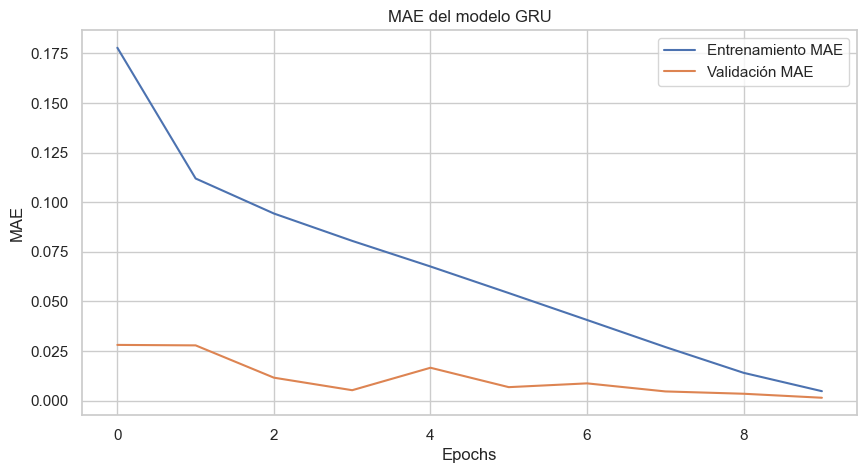

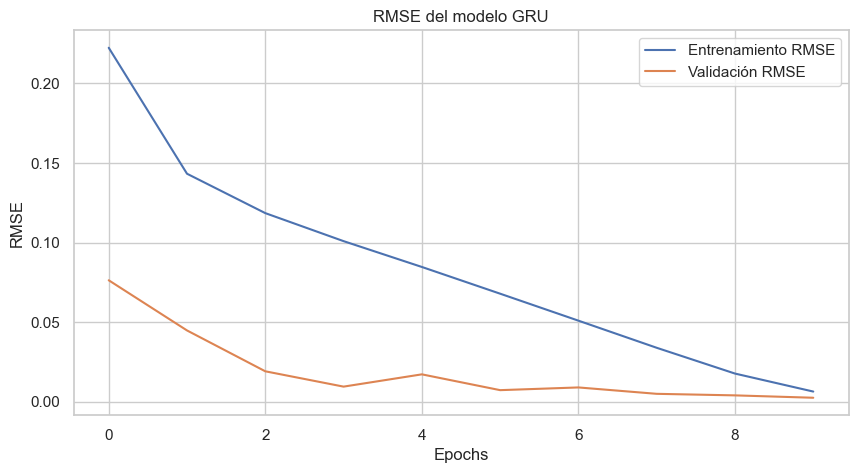

In [152]:
# MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Entrenamiento MAE')
plt.plot(history.history['val_mae'], label='Validación MAE')
plt.title('MAE del modelo GRU')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# RMSE
plt.figure(figsize=(10, 5))
plt.plot(history.history['rmse'], label='Entrenamiento RMSE') 
plt.plot(history.history['val_rmse'], label='Validación RMSE')  
plt.title('RMSE del modelo GRU')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

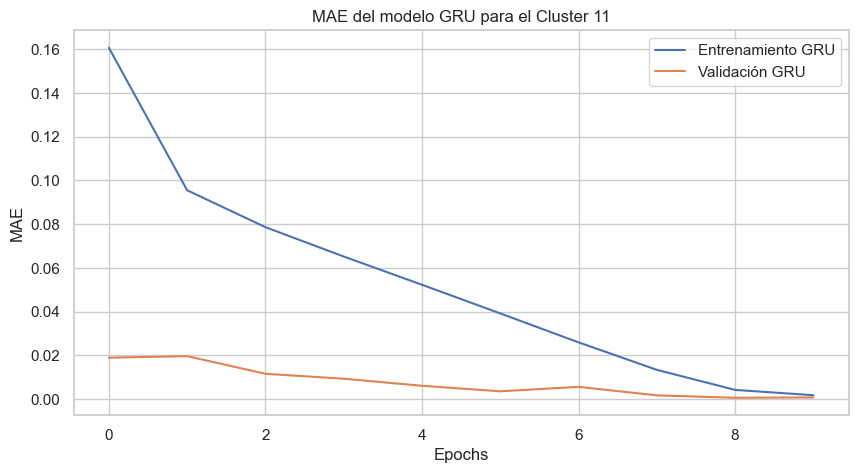

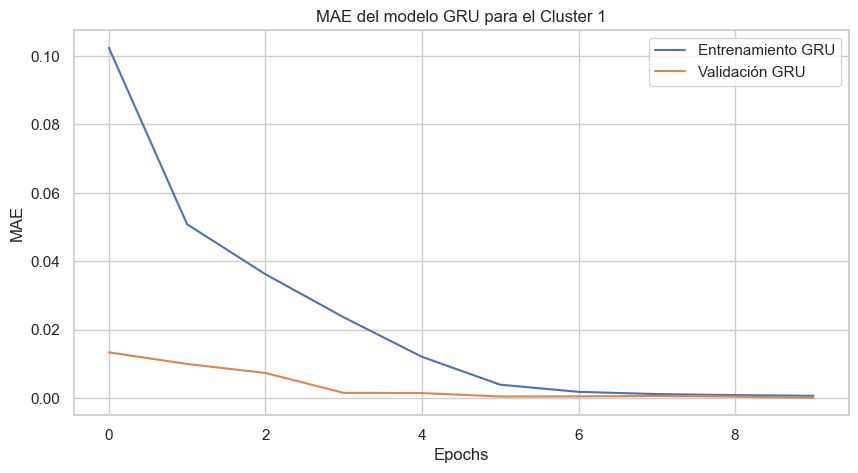

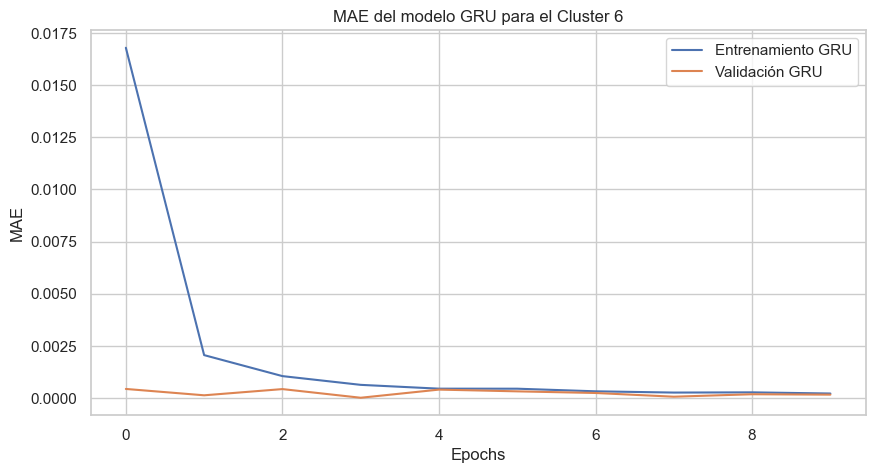

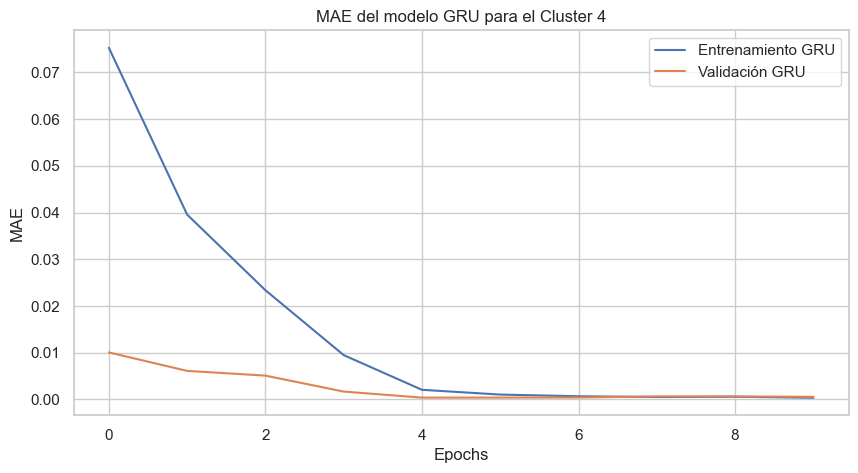

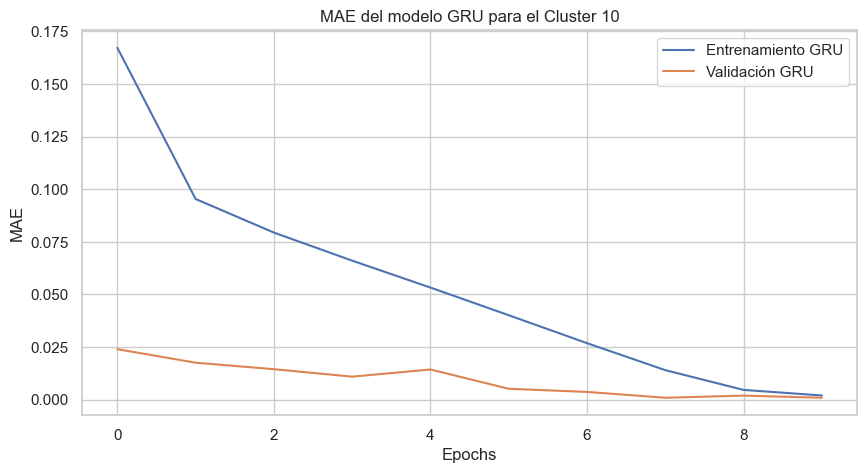

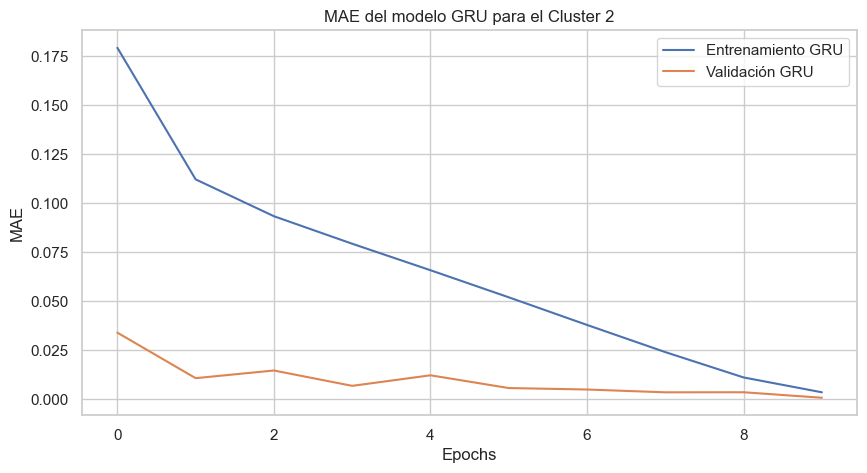

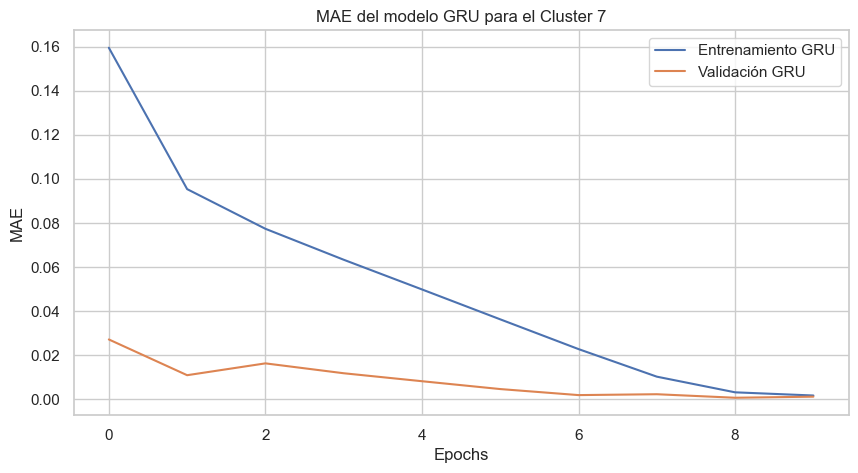

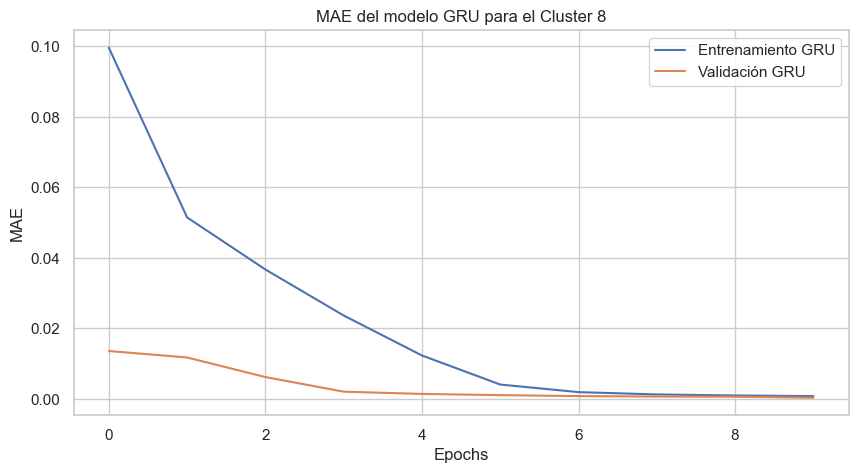

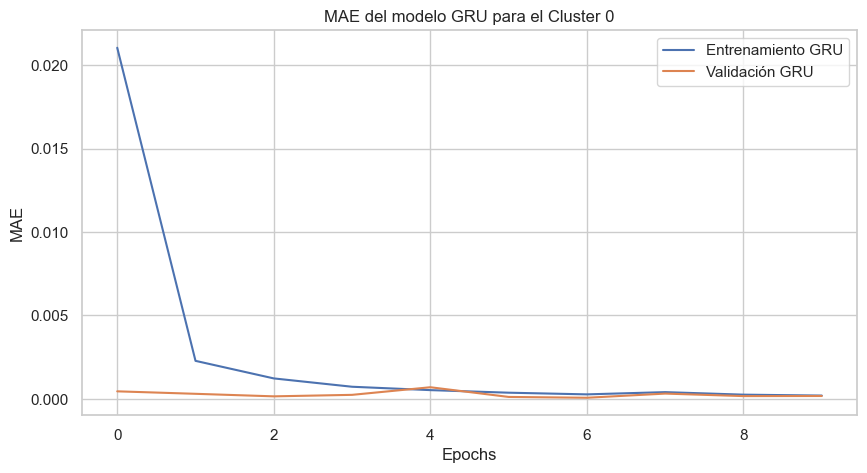

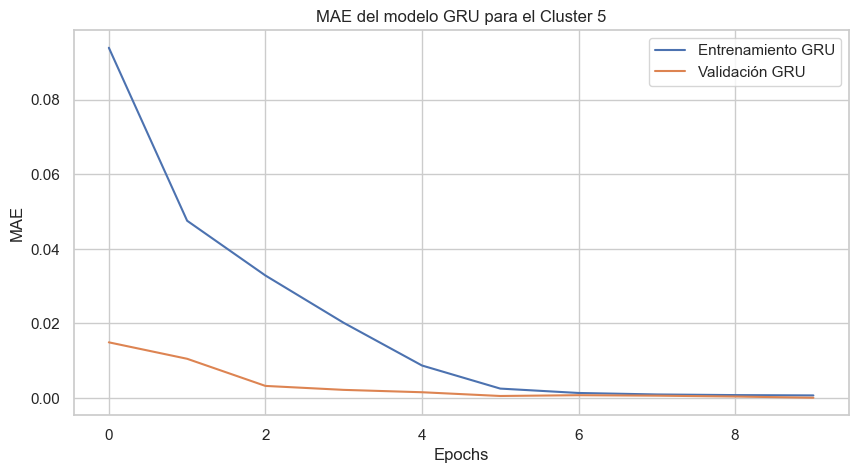

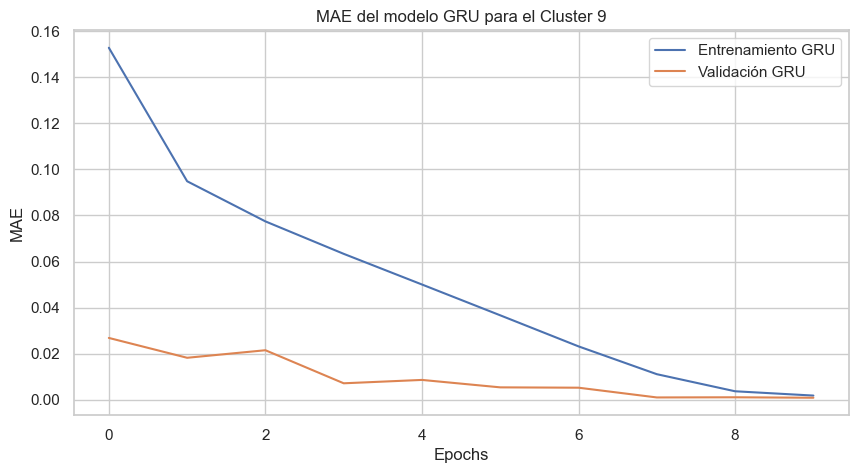

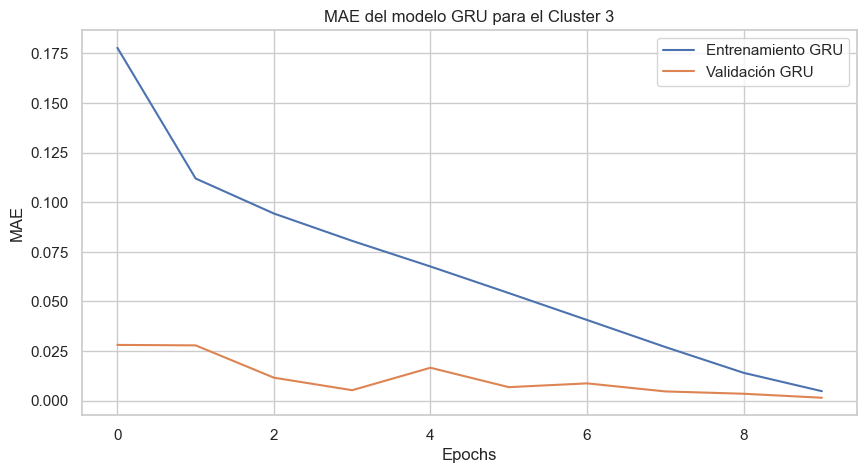

In [153]:
for cluster, history in histories_GRU.items():
    # MAE
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mae'], label='Entrenamiento GRU')
    plt.plot(history.history['val_mae'], label='Validación GRU')
    plt.title(f'MAE del modelo GRU para el Cluster {cluster}')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()



## __8. Predicción ventas 2024 con nuevo modelo (GRU)__:


Preparación de 'last_observations' para las predicciones 2024.

In [183]:
look_back = 84

last_observations_cluster = {}

for cluster in models_LSTM.keys():
    df_cluster = df_scaled[df_scaled['cluster'] == cluster].copy()
    
    df_cluster.sort_values('fecha', inplace=True)
    
    last_features = df_cluster[['precio_promedio_scaled', 'ventas_scaled', 'mes_sin', 'mes_cos']][-look_back:]
    

    last_observations = last_features.to_numpy().reshape(1, look_back, -1)
    
    last_observations_cluster[cluster] = last_observations


In [184]:
last_observations_cluster

{11: array([[[0.15779338, 0.38382261, 0.5       , 0.8660254 ],
         [0.55633377, 0.3828857 , 0.5       , 0.8660254 ],
         [0.3766241 , 0.49422236, 0.5       , 0.8660254 ],
         [0.1957371 , 0.22392255, 0.5       , 0.8660254 ],
         [0.19587106, 0.31089944, 0.5       , 0.8660254 ],
         [0.48640339, 0.15771393, 0.5       , 0.8660254 ],
         [0.01466991, 0.08931918, 0.5       , 0.8660254 ],
         [0.279644  , 0.47954403, 0.5       , 0.8660254 ],
         [0.30610653, 0.30371643, 0.5       , 0.8660254 ],
         [0.59537159, 0.32573392, 0.5       , 0.8660254 ],
         [0.58903207, 0.24718926, 0.5       , 0.8660254 ],
         [0.0864338 , 0.2532792 , 0.5       , 0.8660254 ],
         [0.19840403, 0.3054341 , 0.5       , 0.8660254 ],
         [0.13014196, 0.44409744, 0.5       , 0.8660254 ],
         [0.58917898, 0.01670831, 0.5       , 0.8660254 ],
         [0.5909642 , 0.16396002, 0.5       , 0.8660254 ],
         [0.36934904, 0.29934416, 0.5       , 0.8660

Predicciones para cada cluster para los 12 meses de 2024:

In [187]:
predictions_2024_cluster = {}

for cluster, model in models_GRU.items():
    last_observations = last_observations_cluster[cluster]
    predictions = []
    for _ in range(12): 
        current_pred = model_GRU.predict(last_observations)
        
        last_pred = current_pred[-1, 0]
        predictions.append(last_pred)
        
        new_observation = np.zeros((1, 1, last_observations.shape[2]))
        new_observation[0, 0, -1] = last_pred  
        last_observations = np.append(last_observations[:, 1:, :], new_observation, axis=1)
    predictions_2024_cluster[cluster] = predictions


1/1 [==============================] - 0s 57ms/step


C:\Users\ferna\AppData\Local\Temp\ipykernel_28308\414254972.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_observation[0, 0, -1] = last_pred  # Asume que 'ventas_scaled' es la última característica


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 25ms/step


In [188]:
predictions_2024_cluster

{11: [array([1.0125685], dtype=float32),
  array([1.0122988], dtype=float32),
  array([1.0121497], dtype=float32),
  array([1.0129166], dtype=float32),
  array([1.0127208], dtype=float32),
  array([1.0128806], dtype=float32),
  array([1.0132693], dtype=float32),
  array([1.0122547], dtype=float32),
  array([1.0126728], dtype=float32),
  array([1.0124084], dtype=float32),
  array([1.0126013], dtype=float32),
  array([1.012906], dtype=float32)],
 1: [array([1.0062335], dtype=float32),
  array([1.0053359], dtype=float32),
  array([1.0061715], dtype=float32),
  array([1.0061496], dtype=float32),
  array([1.0057541], dtype=float32),
  array([1.0067925], dtype=float32),
  array([1.0067117], dtype=float32),
  array([1.0065678], dtype=float32),
  array([1.0058266], dtype=float32),
  array([1.0061731], dtype=float32),
  array([1.005838], dtype=float32),
  array([1.0055946], dtype=float32)],
 6: [array([0.99910444], dtype=float32),
  array([0.9996764], dtype=float32),
  array([0.9977417], dtype=

Verificación si hay valores negativos en las predicciones de cada cluster:

In [189]:
predictions_2024_scalar = {cluster: [pred[0] for pred in predictions] for cluster, predictions in predictions_2024_cluster.items()}

for cluster, predictions in predictions_2024_scalar.items():
    if any(prediction < 0 for prediction in predictions):
        print(f"Cluster {cluster} tiene valores negativos en sus predicciones.")
    else:
        print(f"Cluster {cluster} no tiene valores negativos en sus predicciones.")


Cluster 11 no tiene valores negativos en sus predicciones.
Cluster 1 no tiene valores negativos en sus predicciones.
Cluster 6 no tiene valores negativos en sus predicciones.
Cluster 4 no tiene valores negativos en sus predicciones.
Cluster 10 no tiene valores negativos en sus predicciones.
Cluster 2 no tiene valores negativos en sus predicciones.
Cluster 7 no tiene valores negativos en sus predicciones.
Cluster 8 no tiene valores negativos en sus predicciones.
Cluster 0 no tiene valores negativos en sus predicciones.
Cluster 5 no tiene valores negativos en sus predicciones.
Cluster 9 no tiene valores negativos en sus predicciones.
Cluster 3 no tiene valores negativos en sus predicciones.


Reescalamiento de predicción de ventas 2024:

In [190]:
predictions_2024_rescaled = {}

for cluster, predictions in predictions_2024_scalar.items():

    rescaled_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    predictions_2024_rescaled[cluster] = rescaled_predictions


In [191]:
predictions_2024_rescaled

{11: array([6484.4883, 6482.7617, 6481.8066, 6486.718 , 6485.4644, 6486.4873,
        6488.9766, 6482.479 , 6485.1567, 6483.4634, 6484.698 , 6486.65  ],
       dtype=float32),
 1: array([6443.919 , 6438.1714, 6443.522 , 6443.3823, 6440.849 , 6447.4995,
        6446.982 , 6446.0605, 6441.3135, 6443.5327, 6441.3867, 6439.828 ],
       dtype=float32),
 6: array([6398.2646, 6401.9277, 6389.538 , 6399.35  , 6385.7354, 6394.5044,
        6403.534 , 6394.5083, 6389.0093, 6396.8477, 6397.105 , 6390.989 ],
       dtype=float32),
 4: array([6363.528 , 6358.562 , 6348.693 , 6351.0986, 6358.1255, 6356.895 ,
        6367.1577, 6365.648 , 6364.686 , 6367.44  , 6352.8267, 6349.62  ],
       dtype=float32),
 10: array([6340.6455, 6342.501 , 6337.668 , 6343.462 , 6340.806 , 6341.0664,
        6333.8584, 6340.216 , 6336.2764, 6325.6523, 6336.1294, 6340.7783],
       dtype=float32),
 2: array([6332.866 , 6350.1914, 6345.4014, 6350.242 , 6334.2515, 6339.752 ,
        6350.3633, 6337.3223, 6346.3115, 6345.

**Asignar Predicciones de Cluster a prod_id**:
- Asumiendo una distribución uniforme de las predicciones de ventas de cada cluster entre los 'prod_id'

In [199]:

final_predictions = pd.DataFrame()

for cluster, predictions in predictions_2024_rescaled.items():

    prod_ids = df_scaled[df_scaled['cluster'] == cluster]['prod_id'].unique()
    
    for month_index, prediction in enumerate(predictions):
        prediction_date = pd.Timestamp(year=2024, month=month_index + 1, day=1)

        pred_per_prod_id = prediction
        
        temp_df = pd.DataFrame({
            'fecha': [prediction_date] * len(prod_ids),
            'prod_id': prod_ids,
            'prediccion_venta': [pred_per_prod_id] * len(prod_ids)
        })
        
        final_predictions = pd.concat([final_predictions, temp_df], ignore_index=True)



In [200]:
final_predictions.describe()

,fecha,prod_id,prediccion_venta
count,144000,144000.000000,144000.000000
mean,2024-06-16 07:59:59.999999744,499.500000,6432.666016
min,2024-01-01 00:00:00,0.000000,6325.652344
25%,2024-03-24 06:00:00,249.750000,6367.369385
50%,2024-06-16 00:00:00,499.500000,6431.623535
75%,2024-09-08 12:00:00,749.250000,6494.432373
max,2024-12-01 00:00:00,999.000000,6531.154785
std,NaN,288.675993,67.399124


In [201]:
final_predictions.head()

,fecha,prod_id,prediccion_venta
0,2024-01-01,698,6484.488281
1,2024-01-01,780,6484.488281
2,2024-01-01,868,6484.488281
3,2024-01-01,959,6484.488281
4,2024-01-01,930,6484.488281


In [202]:
final_predictions['fecha'] = pd.to_datetime(final_predictions['fecha'])
final_predictions['prod_id'] = final_predictions['prod_id'].astype(int)
final_predictions['prediccion_venta'] = final_predictions['prediccion_venta'].astype(float)

final_predictions.sort_values(by=['fecha', 'prod_id'], inplace=True)


In [204]:
final_predictions.head()

,fecha,prod_id,prediccion_venta
644,2024-01-01,0,6484.488281
12634,2024-01-01,0,6443.918945
24687,2024-01-01,0,6398.264648
36665,2024-01-01,0,6363.527832
48742,2024-01-01,0,6340.645508


Los valores de prediccion_venta obtenidos son sobre 6000, lo cual discrepa con la tendencia de ventas del csv original, por lo tanto, tendrá que ser reanalizado con mayor profundidad, asimismo, se propone probar un nuevo modelo, por ejemplo, serie temporal SARIMAX, con variables exógenas, como por ejemplo precio promedio por id.

**Exportar final_predictions a CSV**

In [203]:
final_predictions.to_csv('predicciones_ventas_2024.csv', index=False)


# **III. Medición del Beneficio Económico**:
- Utilizando solo la información histórica proporcionada, ¿cómo propondrías medir el beneficio
económico de tu solución? Detalla los métodos o métricas que emplearías para demostrar el valor
generado para el cliente.


**Respuesta:**
Para medir el beneficio económico, se puede comparar el rendimiento del modelo actual con el rendimiento del nuevo modelo.
- Comparación de precisión de la proyección.
    - Se puede calcular el error, por ejemplo usando MAE o RMSE del modelo actual vs el nuevo modelo, para saber cuanto mejora la precisión con el nuevo modelo.
    - Además, se puede simular cómo habría funcionado el nuevo modelo en el pasado y comparar con el modelo actual.
- Análisis de costos de inventario.
    - Se pueden estimar los costos asociados con el sobre-inventario y la falta de inventario basándose en las diferencias entre las ventas reales y las proyecciones del modelo actual.
    - Luego se puede realizar el mismo proceso con el nuevo modelo y comparar los resultados.
- Estimación de desperdicios.
    - El desperdicio puede estimarse como la diferencia entre las ventas proyectadas y las ventas reales, asumiendo que cualquier exceso en las proyecciones resulta en desperdicio. Luego se podría multiplicar por el precio promedio para obtener una estimación del valor del desperdicio. Al realizar el mismo proceso con la proyección de ventas del nuevo modelo, se puede comparar y analizar si hay una mejora respecto a esta estimación.
- Impacto en la satisfacción del cliente en base a disponibilidad de los productos.
    - Se pueden comparar las ventas reales con las proyecciones, si las proyecciones son menores a las ventas reales, podría indicar una falta de disponibilidad y en consecuencia afectaría en la satisfacción al cliente.


# **IV. Metodología para la puesta en producción**:
- Diseña una metodología para asegurar que el modelo implementado en un entorno productivo
genera beneficios para la empresa. Explica los pasos clave que seguirías para monitorear y
mantener el rendimiento del modelo a lo largo del tiempo


**Respuesta**:
Para asegurar que el modelo implementado en un entorno productivo genere beneficios continuos para la empresa, se propone la siguiente metodología, que abarca desde la implementación hasta el monitoreo y mantenimiento continuo del modelo:

1. **Realizar pruebas de validación**, para corroborar la precisión y fiabilidad del modelo.
2. **Integración con sistemas existentes** de gestión de inventario, base de datos, etc.
3. **Desplegar gradualmente el modelo**, comenzando con un grupo limitado de productos, para monitorear su rendimiento y hacer ajustes antes de una implementación completa.
4. **Monitorear el rendimiento del modelo en tiempo real**, siguiendo la precisión de las predicciones, la rotación de inventario y el desperdicio de productos.
5. **Realizar una evaluación periódica** para comparar las proyecciones del modelo con los resultados reales y posteriormente realizar los ajustes correspondientes al modelo.
6. **Implementar alertas de notificación a los usuarios** cuando el modelo detecte anomalías o se desvíe de los resultados esperados (mas allá de un intervalo de confianza).
7. **Planificar el reentrenamiento regular del modelo**, en base a los datos actualizados para adaptarse a cambios en el mercado, tendencias de consumo entre otros factores externos.
8. **Establecer un sistema de retroalimentación con los usuarios del modelo**, recogiendo sugerencias y comentarios que puedan contribuir a mejorar su funcionamiento y precisión.
9. **Documentar el modelo**, incluir manuales de usuario, guías de mantenimiento y troubleshooting. 
10. **Capacitar a los usuarios**, para que comprendan cómo interpretar y utilizar las predicciones de forma efectiva.
11. **Realizar análisis de impacto períodico**, para evaluar el retorno de la inversión (ROI) y el valor agregado por el modelo a la empresa.
12. **Realizar reportes a la gerencia**, destacando el rendimiento del modelo y su impacto operacional y comercial en la empresa.